In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.interactive(True)
%matplotlib inline

In [2]:
def describe_anali(dataframe,dis):
    # val -> value(%)NAN and unique typess
    
    #Types lines
    display(dataframe.head())
    
    lin, col = dataframe.shape
    
    munic = dataframe['Município']
    dataframe.drop(['Município'], axis=1,inplace=True)
    
    dataframe = dataframe.replace('-',0)
    dataframe = dataframe.replace(np.NaN,0)
    #Describ dataframe
    for val in dataframe.columns: 
        dataframe[val] = dataframe[val].astype(int)
#     dataframe = dataframe.apply(pd.to_numeric, errors='coerce')
    display(dataframe.describe())
    
    idx = 0
    dataframe.insert(loc=idx, column='Município', value=munic)
    
    #Nan Values 
    quant_NaN_porcent = (dataframe.isna().sum() / dataframe.shape[0])*100
    d = {'Names': quant_NaN_porcent.index.values, 'Porcentagem Faltante': quant_NaN_porcent.values}
    df = pd.DataFrame(data=d)
    display(df)
    
    #If many variables display up value!
    lin, col = dataframe.shape
    if(dis):
        display(df[df['Porcentagem Faltante']>val])
        for val in range(0,col):
            string_val = 'dataframe.'+ str(dataframe.columns[val]) + '.unique()'
            print("Existem {} tipos de {}, nesse dataset como: \n {} \n... \n".format(len(eval(string_val)),dataframe.columns[val], ", " .join(eval(string_val)[0:10].astype(str))))
    
    

In [3]:
def plot_RF(dataframe,label_s,name_y_label):    
    aux_colum = dataframe["Município"].str.split(" ", n = 1, expand = True)
    dataframe["Município"]= aux_colum[1] 
    dataframe.insert(0, "Val_Municipio", aux_colum[0].values, True) 

    dataframe.insert(0, "Estado",  dataframe["Val_Municipio"].str[0:2], True) 

    #Convert int
    dataframe["Estado"] = dataframe["Estado"].apply(pd.to_numeric, errors='coerce')
    dataframe["Val_Municipio"] = dataframe["Val_Municipio"].apply(pd.to_numeric, errors='coerce')

    UF = 11,12,13,14,15,16,17,21,22,23,24,25,26,27,28,29,31,32,33,35,41,42,43,50,51,52,53
    UF_sig = 'RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS','MT','GO','DF'
#Toy
#     UF = 11,12
#     UF_sig = 'RO','AC'
    state_dict = dict(zip(UF, UF_sig))

    for UF_num, Uf_sig in state_dict.items():
        dataframe_aux = dataframe.copy()
        dataframe_aux = dataframe_aux[dataframe_aux['Estado']== UF_num]

        #display(est_hosp5.describe())
        dataframe_aux = dataframe_aux.replace('-',0)
        dataframe_aux = dataframe_aux.replace(np.NaN,0)
        
        values = dataframe_aux.values
        
        values_np = dataframe_aux.values[:,3:values.shape[1]].astype(int)
        num_hosp = values_np.shape[0]

        #Plot Evolution State
        df2 = pd.DataFrame(values_np, columns= label_s)
        display(df2.describe())
        out = df2.sum()
        
        #Plot data State
        plt.figure(figsize=(20, 10))
        plt.plot(out.index,out.values)
        plt.title('Estado: %s / Municípios: %s / Sum Total: %s' %(Uf_sig, num_hosp,out.sum()),fontsize=23)
        plt.xticks(rotation=90)
        plt.grid(True)
        plt.ylabel(name_y_label,fontsize=23)
        plt.show()
        
        tag = dataframe_aux['Município'].values
        
        #Plot data State for City
        plt.figure(figsize=(20, 40))
        for val in range(0,num_hosp):
            plt.plot(label_s, values_np[val,:],'*', label = str(tag[val]))
        
        plt.plot(out.index,out.values, label = Uf_sig )
        plt.title('Estado: %s / Municípios: %s / Sum Total: %s' %(Uf_sig, num_hosp,out.sum()),fontsize=23)
        plt.xticks(rotation=90)
        plt.grid(True)
        plt.ylabel(name_y_label,fontsize=23)
        plt.legend()
        plt.show()

## RF

### Leitos de internacao

,Município,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,...,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez
0,110001 Alta Floresta D'Oeste,45,45,45,45,45,45,45,45,45,...,43,43,43,43,43,43,43,43,43,43
1,110037 Alto Alegre dos Parecis,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
2,110040 Alto Paraíso,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,16,16,16
3,110034 Alvorada D'Oeste,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
4,110002 Ariquemes,85,85,85,85,96,92,92,96,96,...,138,138,138,148,148,148,134,134,134,134


,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,...,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez
count,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,...,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000
mean,114.771892,114.919565,114.757624,114.928126,114.892099,114.766899,114.711610,114.490815,114.121990,114.074193,...,107.909399,107.685393,107.650080,107.687177,107.671482,107.532370,107.395042,107.105404,107.032638,107.108971
std,4309.998779,4315.531495,4309.444142,4315.874007,4314.470087,4309.903323,4307.851654,4299.566753,4285.736746,4283.919392,...,4052.497783,4044.053151,4042.622256,4044.019580,4043.376054,4038.184573,4033.050392,4022.015523,4019.263969,4022.056649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,16.000000,16.000000,16.000000
75%,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
max,321763.000000,322177.000000,321723.000000,322201.000000,322100.000000,321749.000000,321594.000000,320975.000000,319941.000000,319807.000000,...,302524.000000,301896.000000,301797.000000,301901.000000,301857.000000,301467.000000,301082.000000,300270.000000,300066.000000,300280.000000


,Names,Porcentagem Faltante
0,Município,0.0
1,2014/Jan,0.0
2,2014/Fev,0.0
3,2014/Mar,0.0
4,2014/Abr,0.0
...,...,...
56,2018/Ago,0.0
57,2018/Set,0.0
58,2018/Out,0.0
59,2018/Nov,0.0


,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.00000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,61.679245,61.528302,61.452830,61.679245,61.886792,61.811321,61.90566,61.981132,61.264151,61.150943,...,62.358491,62.358491,62.754717,62.943396,62.943396,62.735849,62.113208,63.320755,63.339623,62.056604
std,162.292444,161.238310,161.258102,162.136430,162.173893,162.158642,162.10885,162.124061,161.854891,161.832225,...,165.449515,165.449515,166.411550,166.504148,166.504148,166.498805,163.891106,173.365862,173.369874,164.472632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
50%,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
75%,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000,45.000000,45.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
max,1174.000000,1166.000000,1166.000000,1172.000000,1172.000000,1172.000000,1172.00000,1172.000000,1173.000000,1173.000000,...,1186.000000,1186.000000,1193.000000,1193.000000,1193.000000,1193.000000,1174.000000,1246.000000,1246.000000,1178.000000


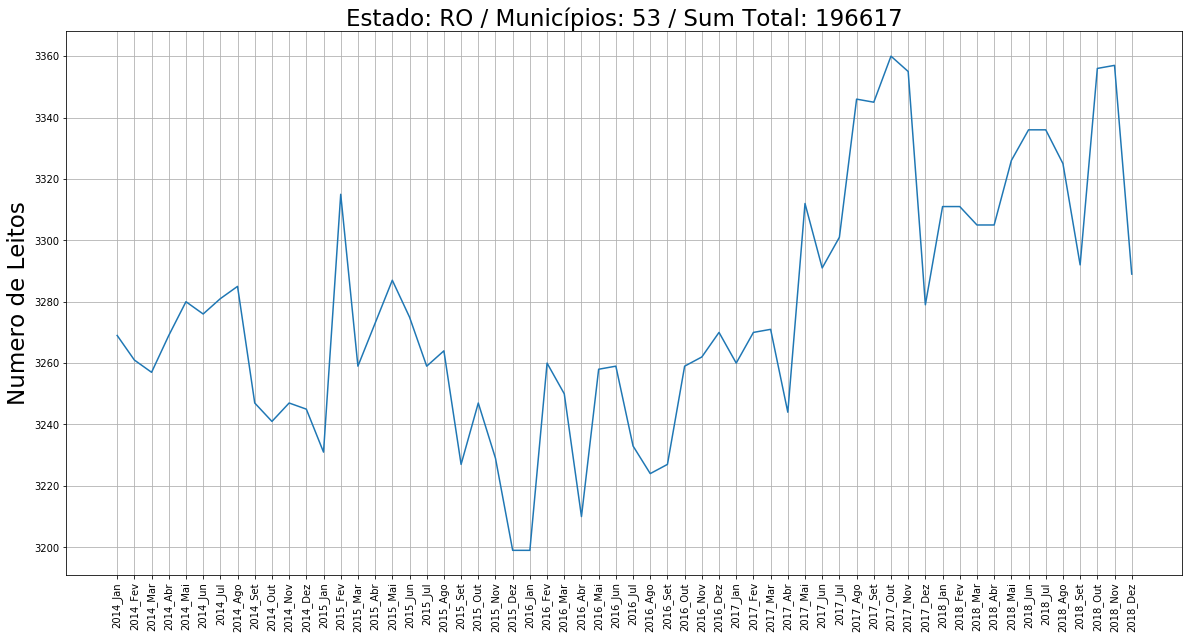

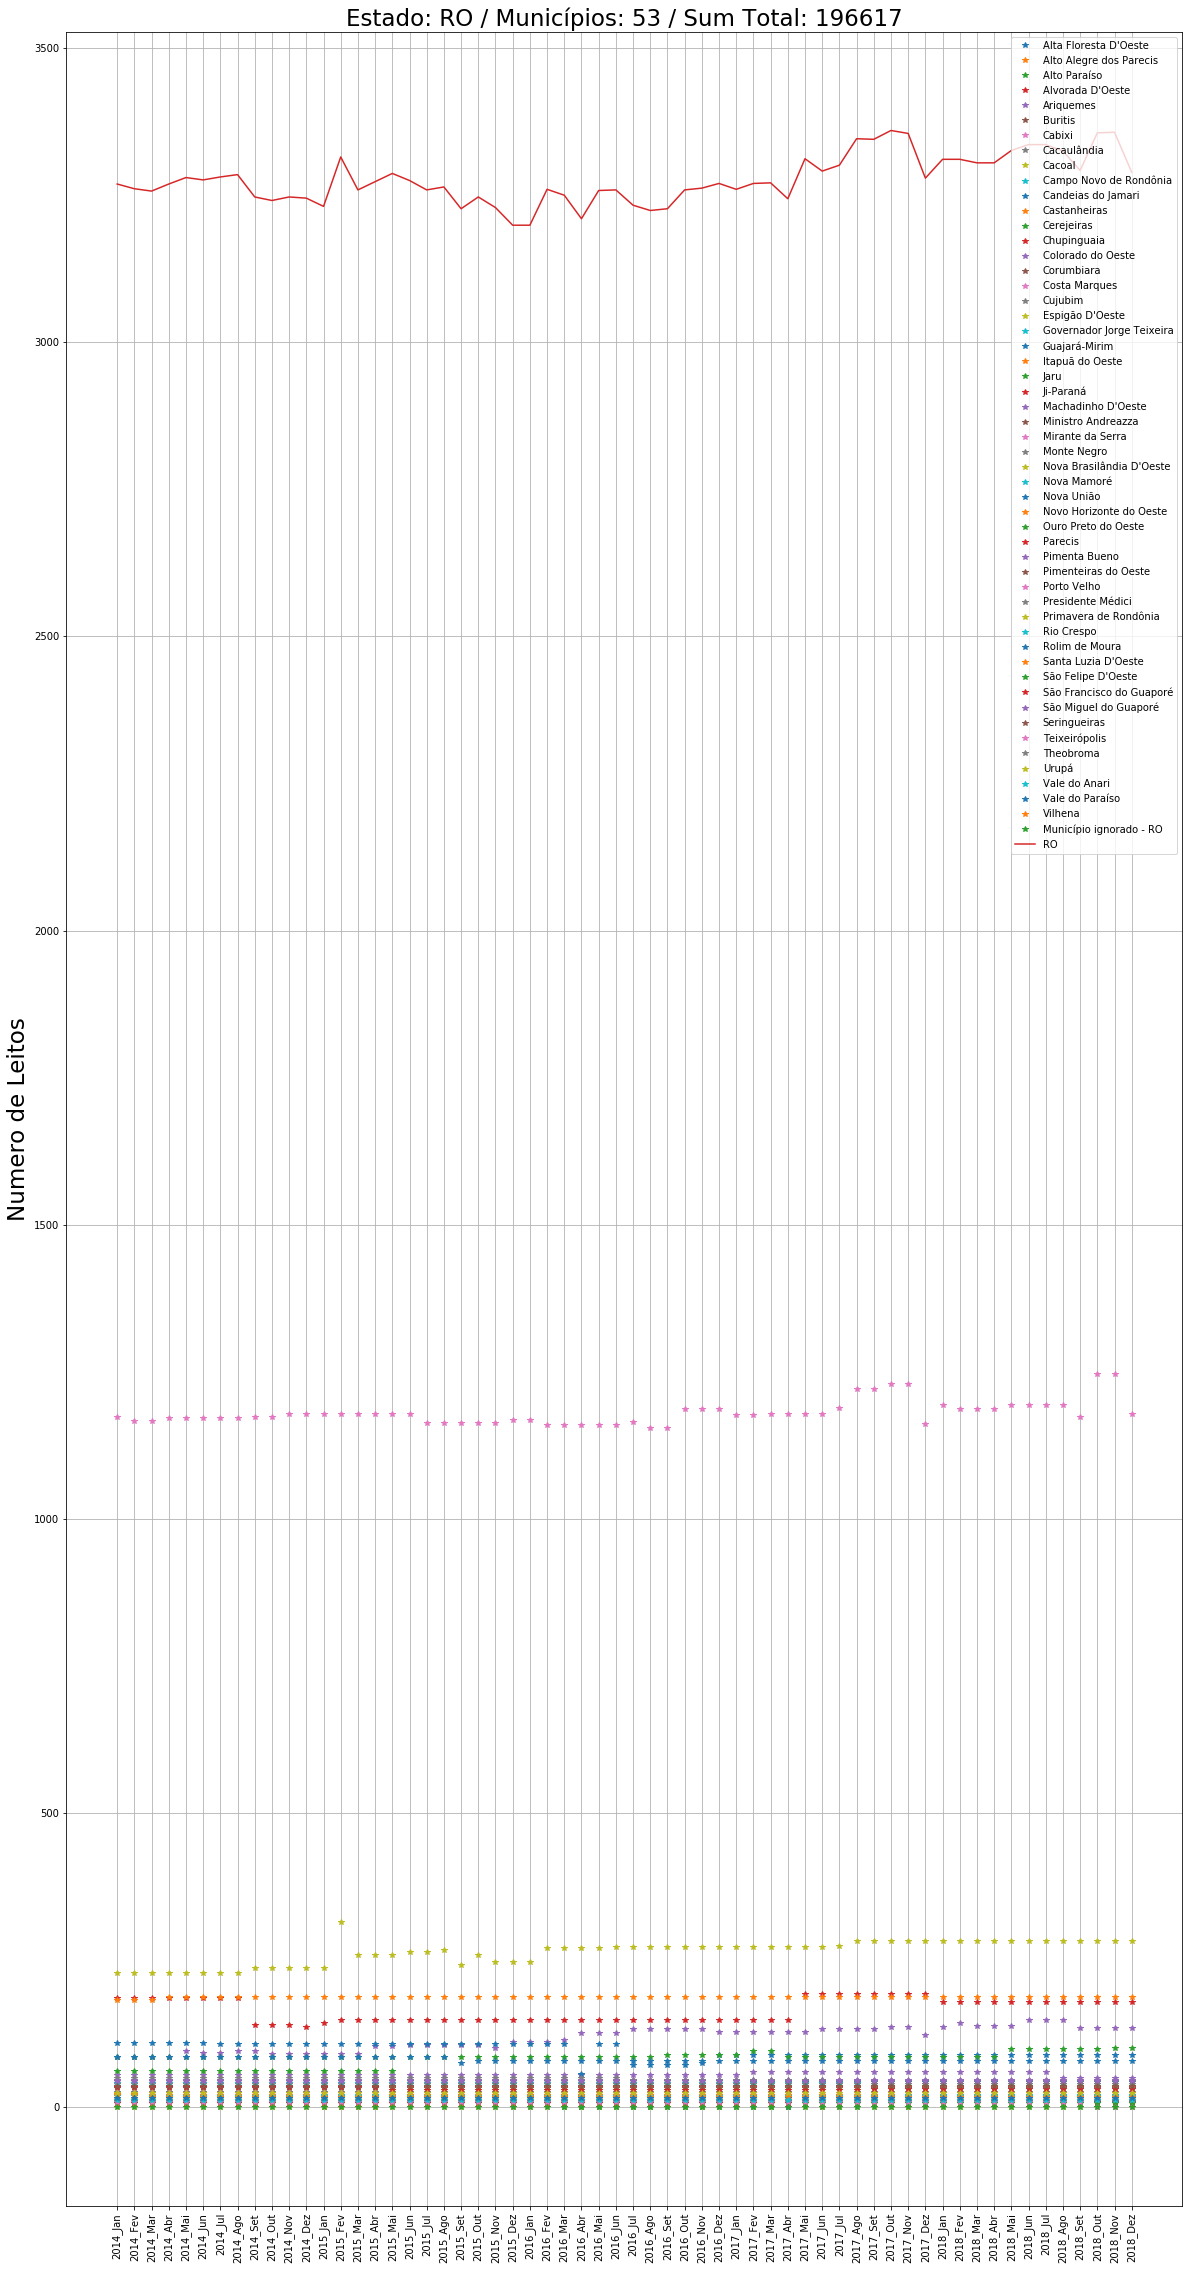

,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000
mean,51.826087,51.478261,52.086957,52.086957,52.173913,52.478261,52.260870,52.217391,53.260870,53.217391,...,56.695652,56.695652,56.695652,56.695652,56.695652,56.826087,56.826087,56.869565,57.00000,56.869565
std,129.615043,127.321308,127.574902,127.574902,127.516007,129.064068,128.066821,128.080570,131.273558,131.074218,...,146.335677,146.335677,146.335677,146.335677,146.335677,146.945461,146.945461,147.148751,147.75871,147.148751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,8.000000,8.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.500000,11.500000,11.500000,11.500000,11.500000,11.500000,11.500000,11.500000,11.50000,11.500000
50%,15.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000
75%,35.500000,34.500000,34.500000,34.500000,34.500000,34.500000,34.500000,34.500000,36.000000,36.000000,...,41.500000,41.500000,41.500000,41.500000,41.500000,41.500000,41.500000,41.500000,41.50000,41.500000
max,622.000000,611.000000,612.000000,612.000000,611.000000,619.000000,614.000000,614.000000,629.000000,628.000000,...,711.000000,711.000000,711.000000,711.000000,711.000000,714.000000,714.000000,715.000000,718.00000,715.000000


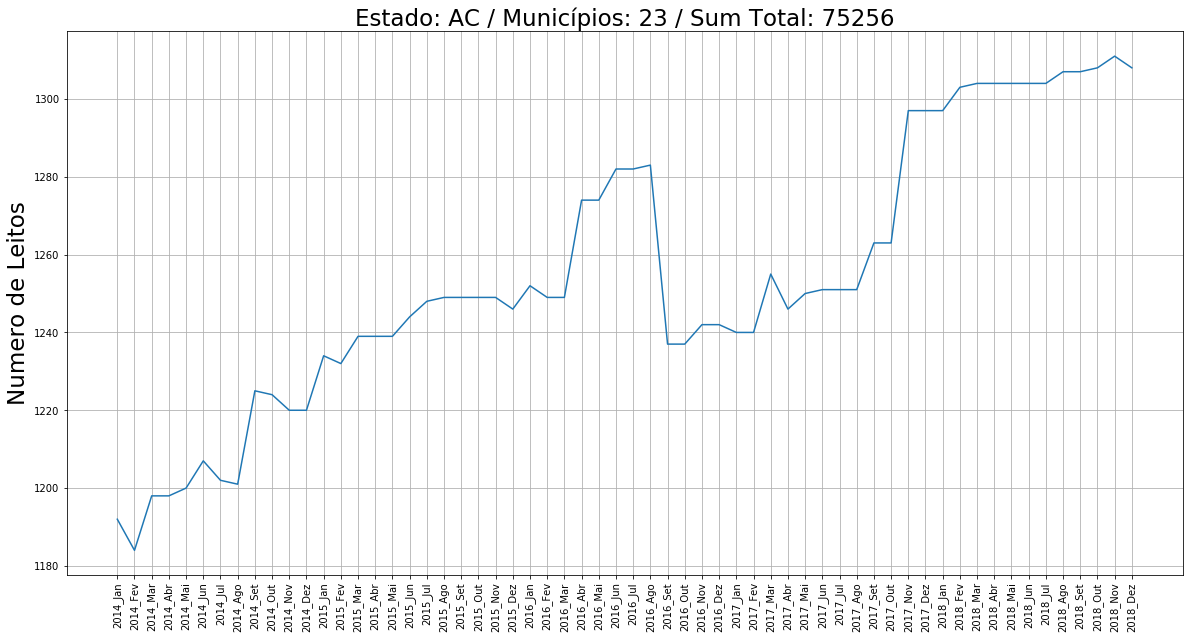

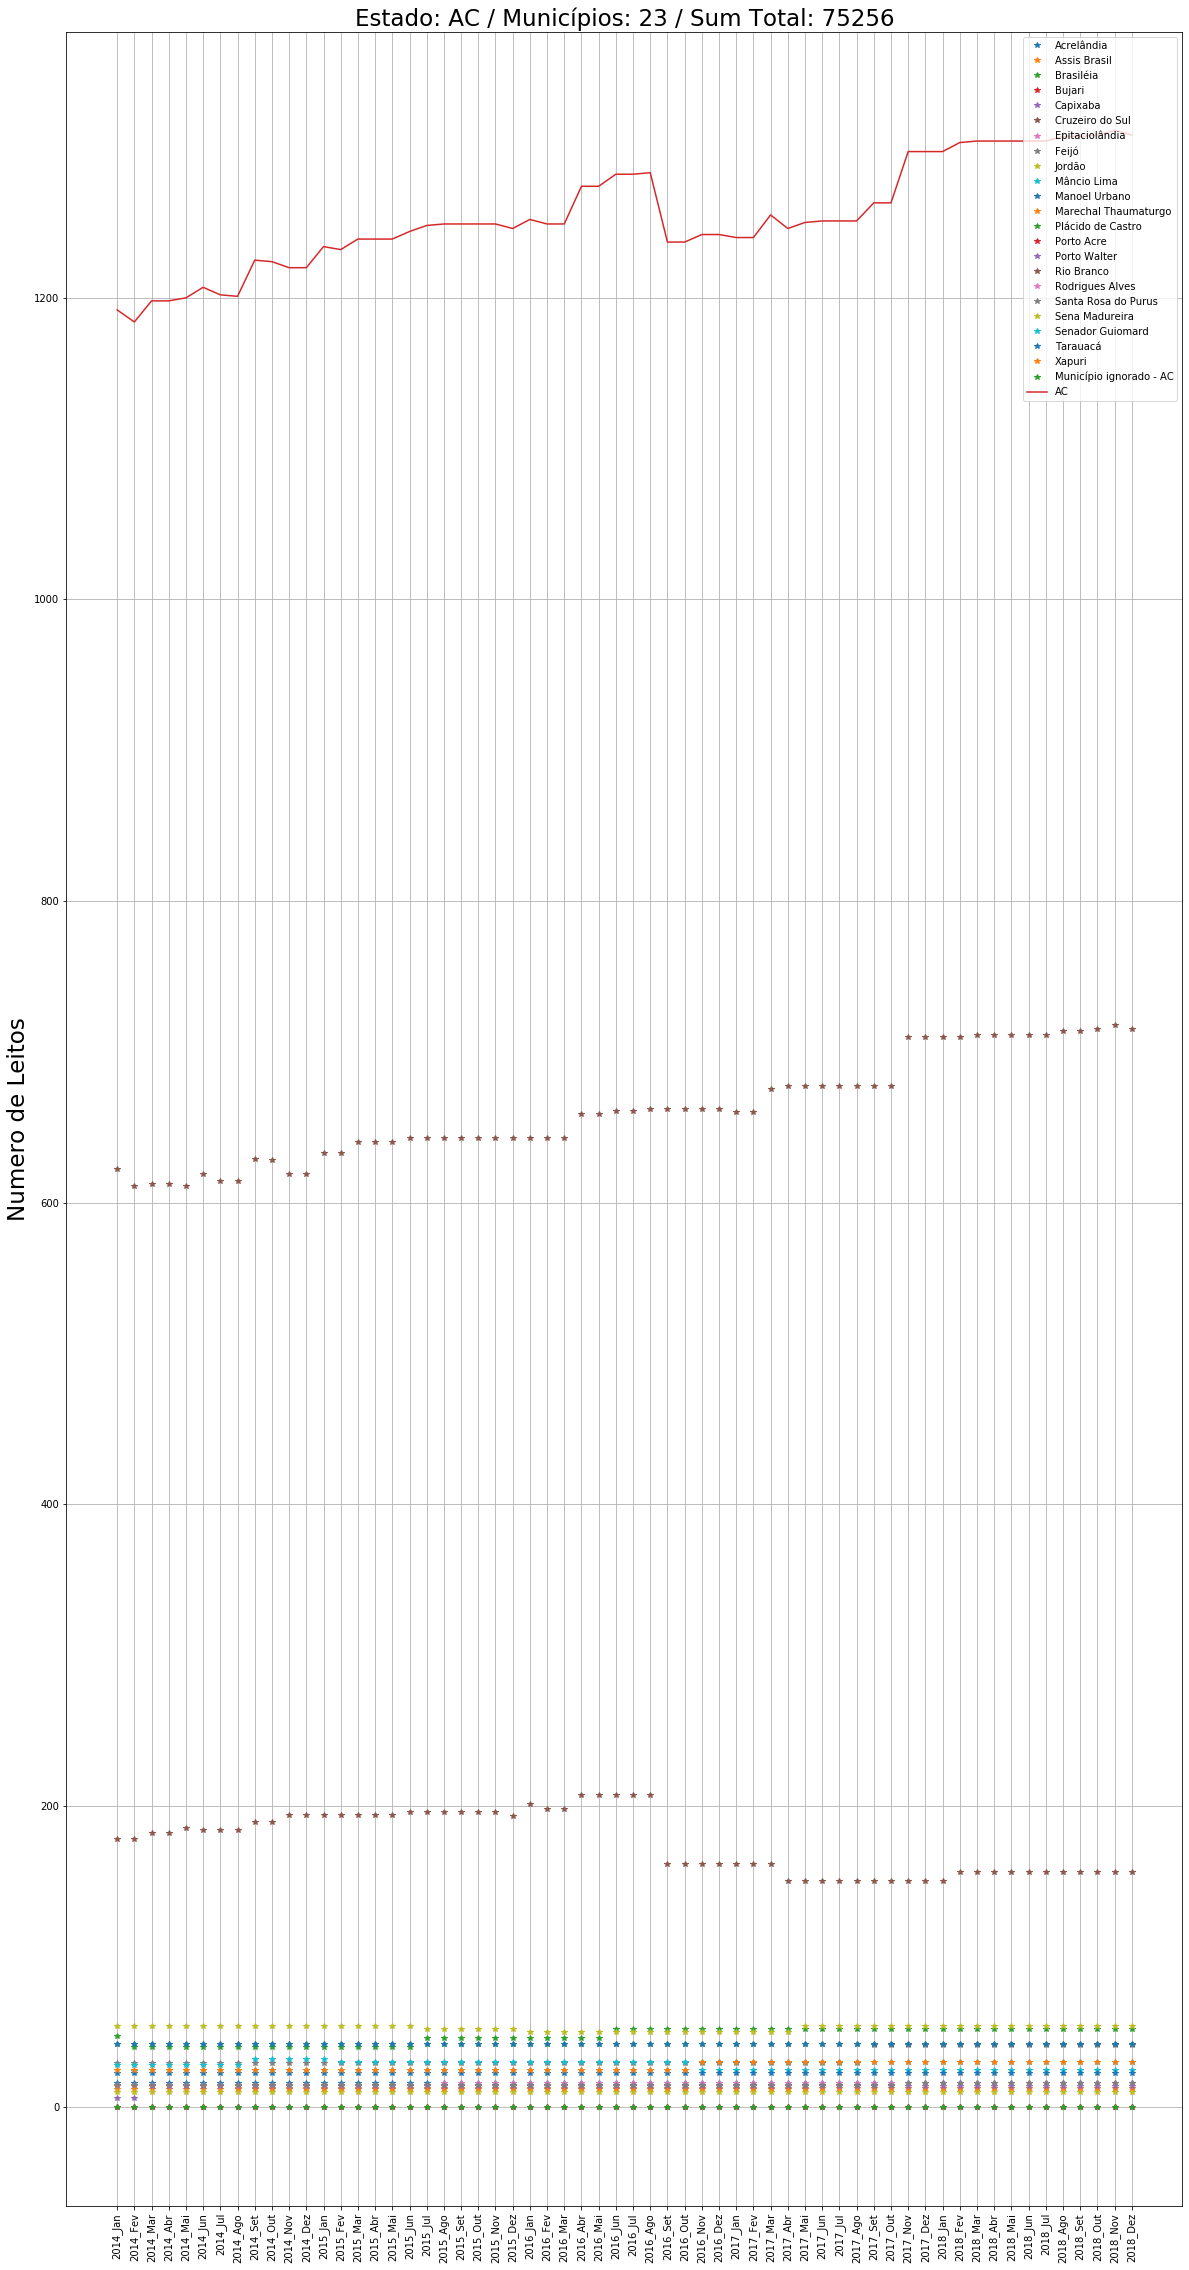

In [4]:
data_leitos_internacao = pd.read_csv('../data/RF- Leitos de Internação.csv', sep=';', skiprows=3, encoding='latin1')
# data_leitos_internacao
# data_leitos_internacao.values
# data_leitos_internacao.index
dis = False
aux = data_leitos_internacao.copy()
describe_anali(aux,dis)
aux = data_leitos_internacao.copy()
new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
             '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
             '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
             '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
             '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']
name_y_label = 'Numero de Leitos'
plot_RF(aux,new_names,name_y_label)


### RF - Mamografos

,Município,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,...,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez
0,110001 Alta Floresta D'Oeste,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,110037 Alto Alegre dos Parecis,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,110040 Alto Paraíso,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,110034 Alvorada D'Oeste,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,110002 Ariquemes,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4


,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,...,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez
count,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.00000,5604.000000,...,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000
mean,0.705567,0.707352,0.713776,0.719129,0.721984,0.727695,0.730193,0.733405,0.73733,0.739472,...,0.745182,0.747323,0.750178,0.749108,0.747680,0.750535,0.753747,0.752677,0.753747,0.754818
std,26.456569,26.523122,26.763021,26.962828,27.069311,27.282194,27.375249,27.494538,27.64140,27.721002,...,27.932787,28.013593,28.120474,28.080210,28.026839,28.133695,28.254700,28.214532,28.253923,28.293972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1977.000000,1982.000000,2000.000000,2015.000000,2023.000000,2039.000000,2046.000000,2055.000000,2066.00000,2072.000000,...,2088.000000,2094.000000,2102.000000,2099.000000,2095.000000,2103.000000,2112.000000,2109.000000,2112.000000,2115.000000


,Names,Porcentagem Faltante
0,Município,0.0
1,2014/Jan,0.0
2,2014/Fev,0.0
3,2014/Mar,0.0
4,2014/Abr,0.0
...,...,...
56,2018/Ago,0.0
57,2018/Set,0.0
58,2018/Out,0.0
59,2018/Nov,0.0


,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.207547,0.207547,0.207547,0.207547,0.188679,0.169811,0.169811,0.169811,0.169811,0.169811,...,0.207547,0.207547,0.207547,0.226415,0.226415,0.226415,0.226415,0.207547,0.226415,0.264151
std,0.884884,0.884884,0.884884,0.884884,0.760986,0.726844,0.726844,0.726844,0.726844,0.726844,...,0.884884,0.884884,0.884884,0.891013,0.891013,0.891013,0.891013,0.793204,0.891013,1.112014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,7.000000


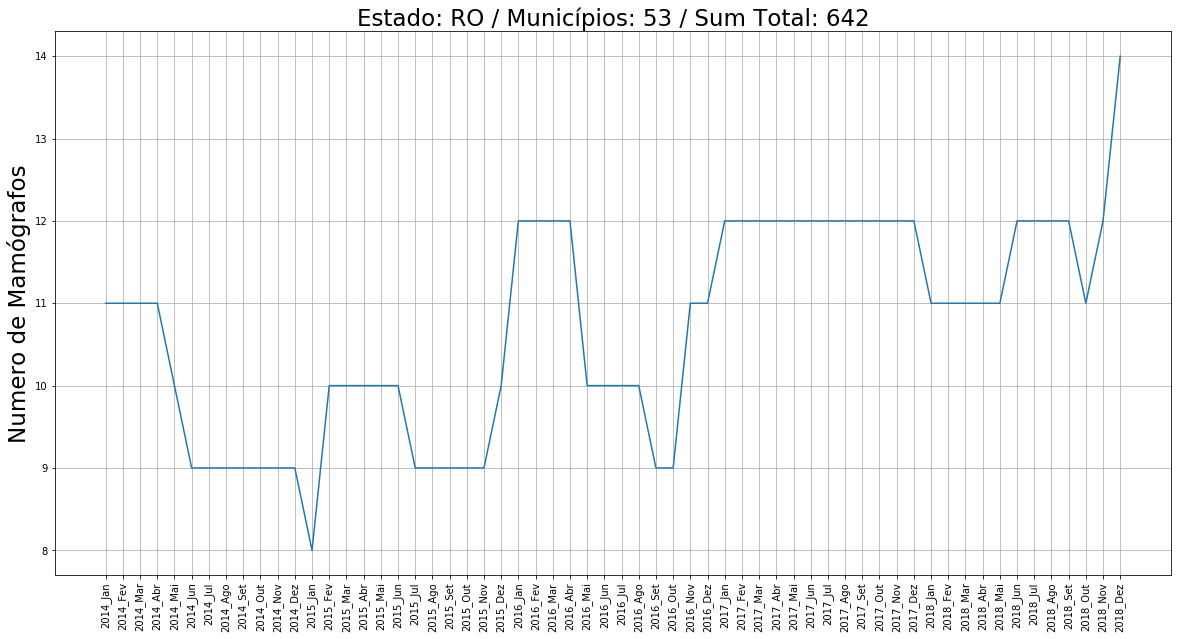

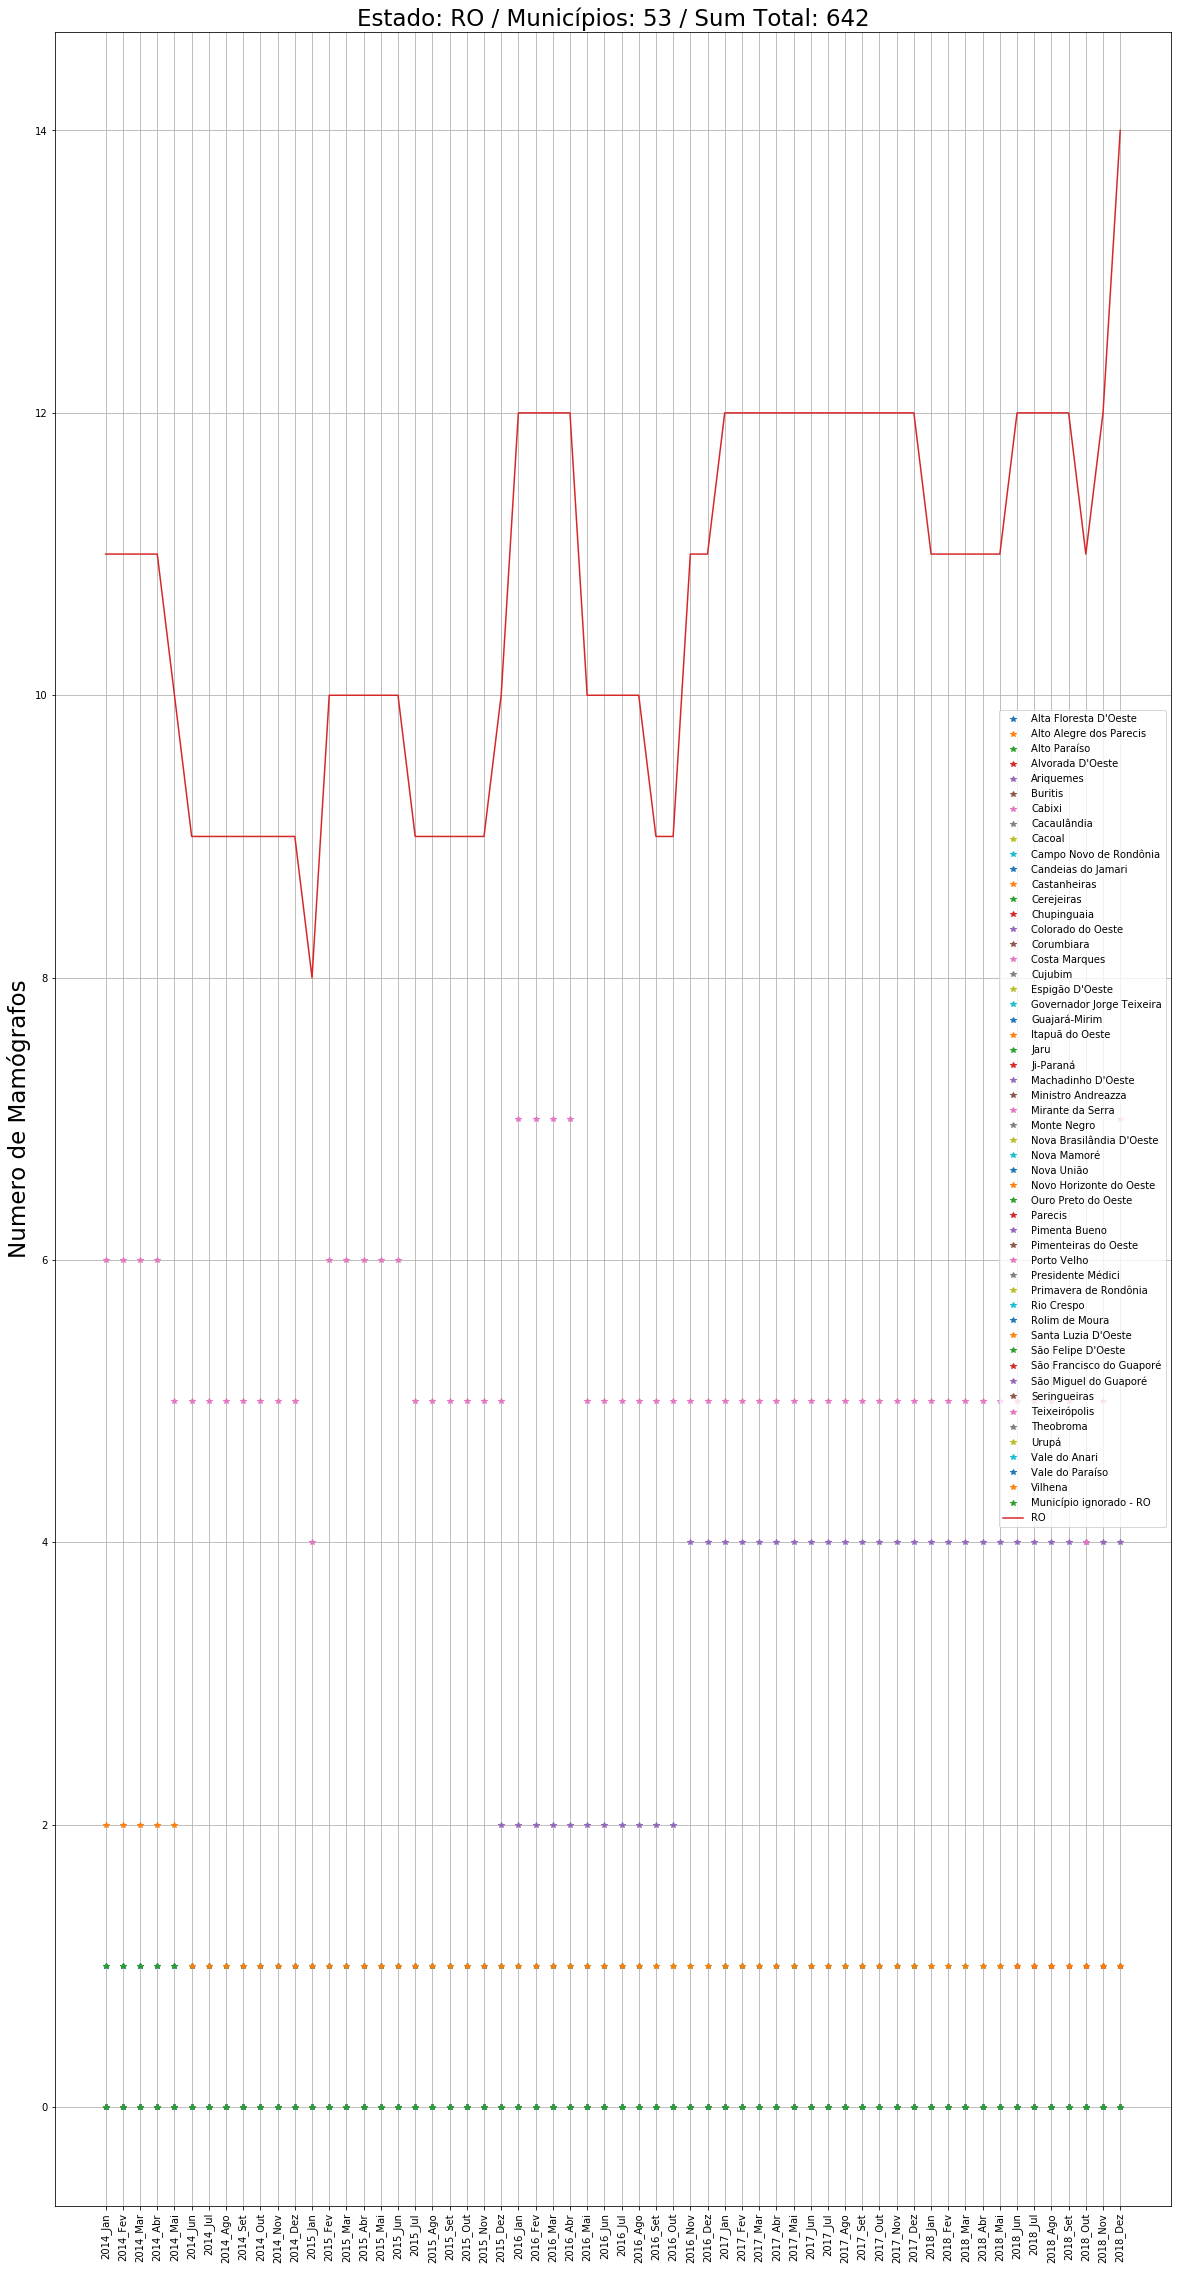

,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.173913,0.173913,0.173913,0.173913,0.173913,0.173913,0.173913,0.173913,0.173913,0.173913,...,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435
std,0.650327,0.650327,0.650327,0.650327,0.650327,0.650327,0.650327,0.650327,0.650327,0.650327,...,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


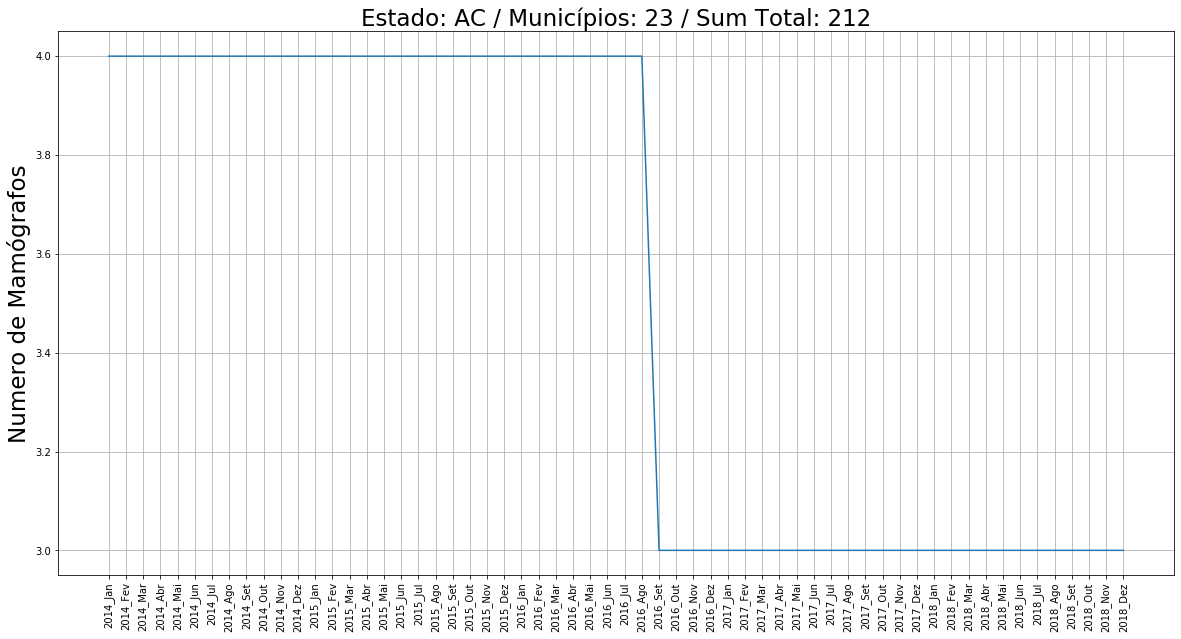

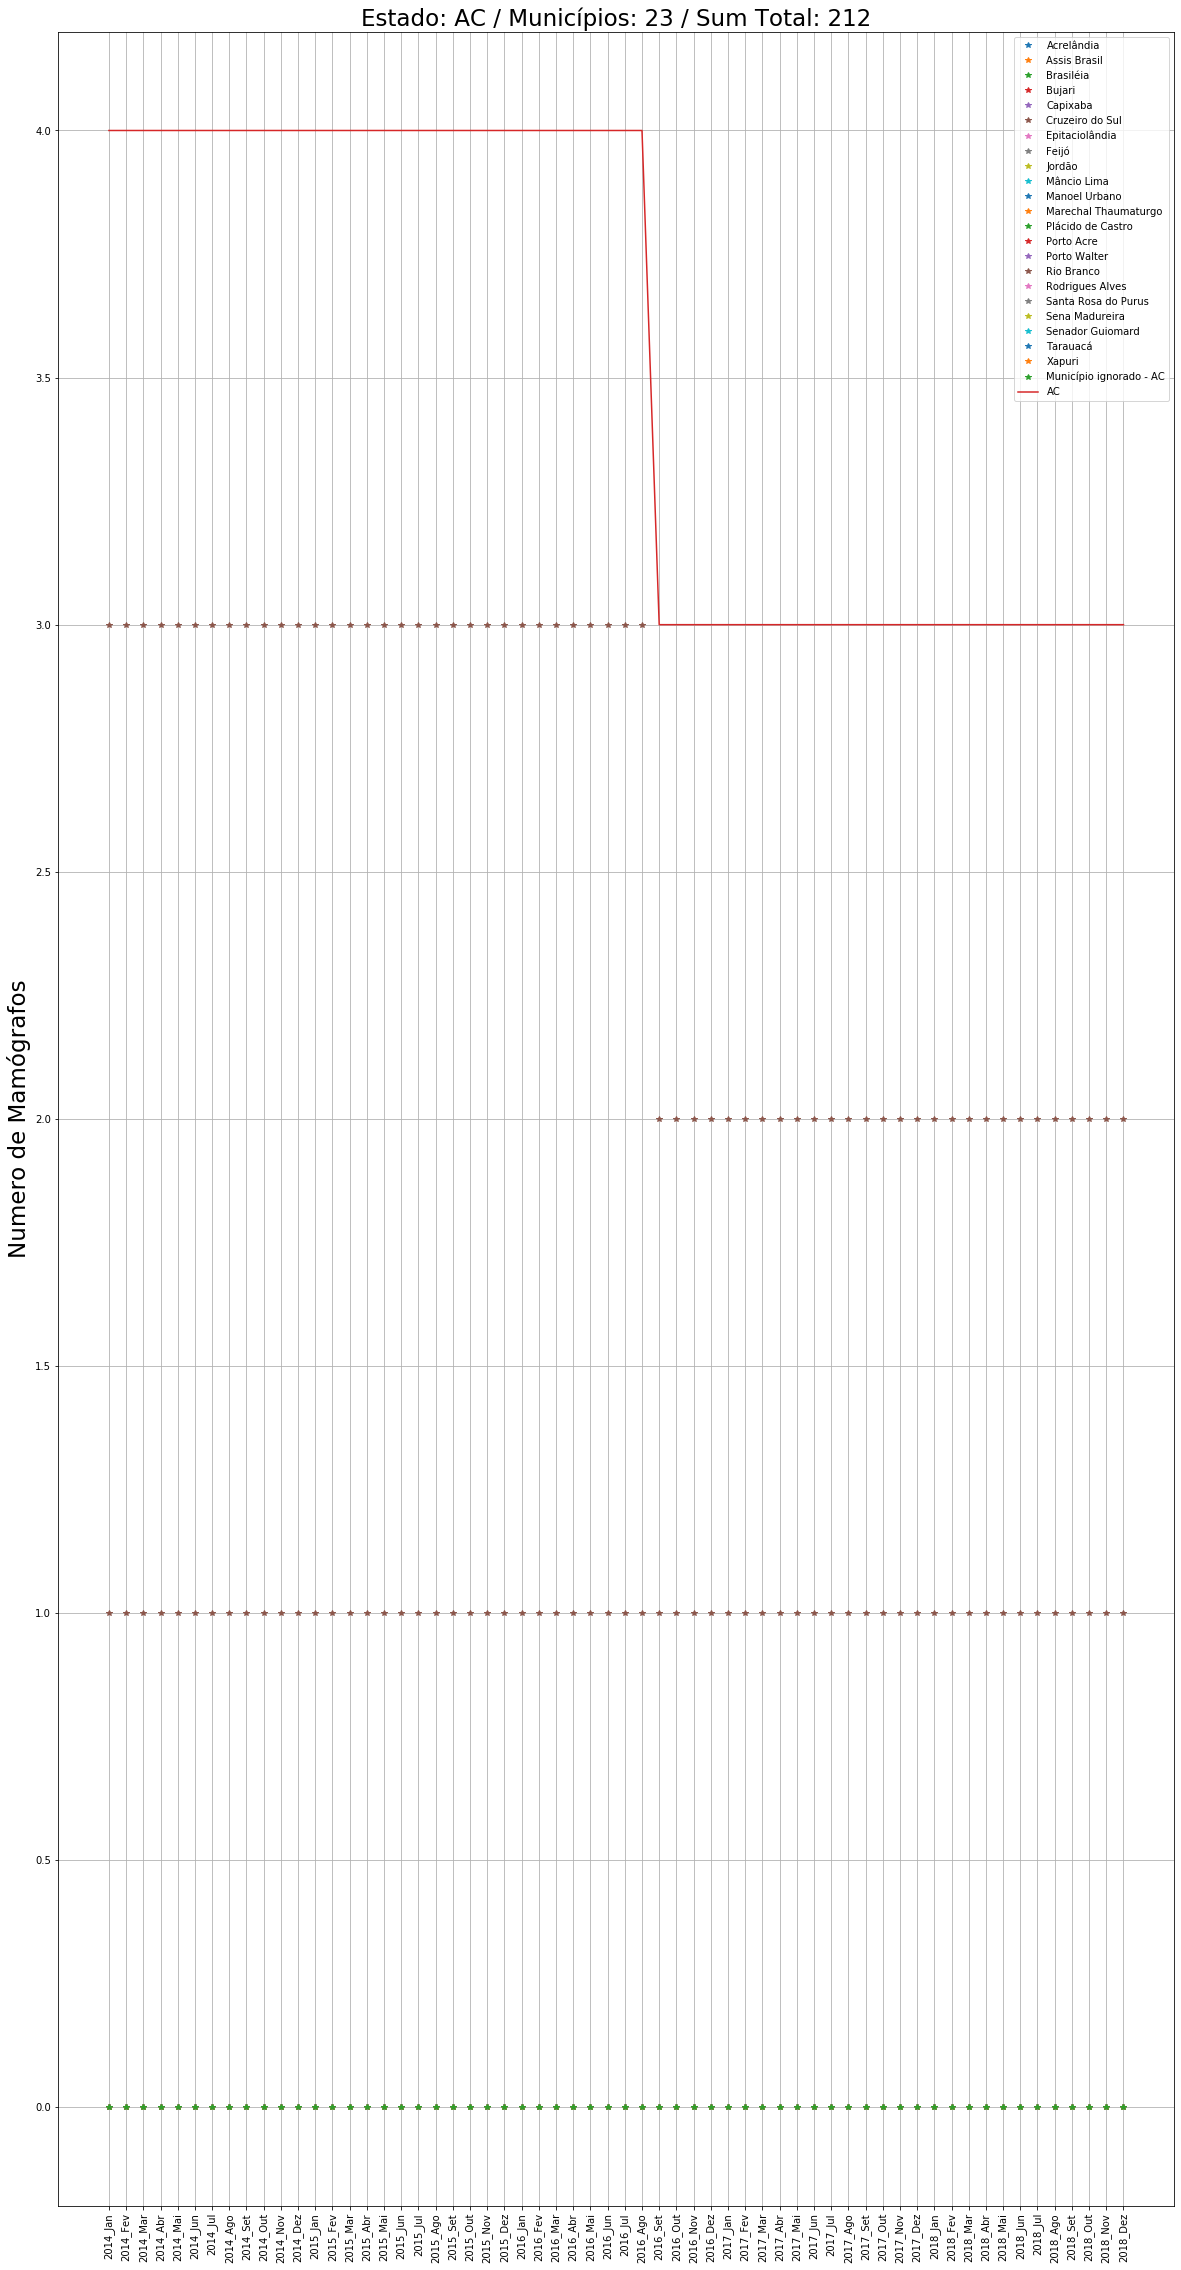

In [5]:
data_mamografos = pd.read_csv('../data/RF- Mamógrafos.csv', sep=';', skiprows=4, encoding='latin1')
dis = False
aux = data_mamografos.copy()
describe_anali(aux,dis)
aux = data_mamografos.copy()
new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
             '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
             '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
             '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
             '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']
name_y_label = 'Numero de Mamógrafos'
plot_RF(aux,new_names,name_y_label)

### RF - Raios X.csv

,Município,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,...,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez
0,110001 Alta Floresta D'Oeste,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
1,110037 Alto Alegre dos Parecis,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,110040 Alto Paraíso,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,110034 Alvorada D'Oeste,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,110002 Ariquemes,4,4,4,4,5,5,5,5,5,...,9,9,9,9,9,9,9,9,9,9


,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,...,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez
count,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,...,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000
mean,6.222698,6.230906,6.244825,6.259101,6.270164,6.283726,6.298715,6.310849,6.330835,6.334404,...,6.667024,6.682370,6.697002,6.721627,6.733048,6.753034,6.773376,6.784083,6.799072,6.830121
std,233.258510,233.564437,234.085432,234.618330,235.028451,235.536213,236.096703,236.550814,237.297436,237.430911,...,249.885887,250.462207,251.011019,251.931932,252.359209,253.106255,253.866557,254.269703,254.829446,255.993467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,17436.000000,17459.000000,17498.000000,17538.000000,17569.000000,17607.000000,17649.000000,17683.000000,17739.000000,17749.000000,...,18681.000000,18724.000000,18765.000000,18834.000000,18866.000000,18922.000000,18979.000000,19009.000000,19051.000000,19138.000000


,Names,Porcentagem Faltante
0,Município,0.0
1,2014/Jan,0.0
2,2014/Fev,0.0
3,2014/Mar,0.0
4,2014/Abr,0.0
...,...,...
56,2018/Ago,0.0
57,2018/Set,0.0
58,2018/Out,0.0
59,2018/Nov,0.0


,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.207547,0.207547,0.207547,0.207547,0.188679,0.169811,0.169811,0.169811,0.169811,0.169811,...,0.207547,0.207547,0.207547,0.226415,0.226415,0.226415,0.226415,0.207547,0.226415,0.264151
std,0.884884,0.884884,0.884884,0.884884,0.760986,0.726844,0.726844,0.726844,0.726844,0.726844,...,0.884884,0.884884,0.884884,0.891013,0.891013,0.891013,0.891013,0.793204,0.891013,1.112014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,7.000000


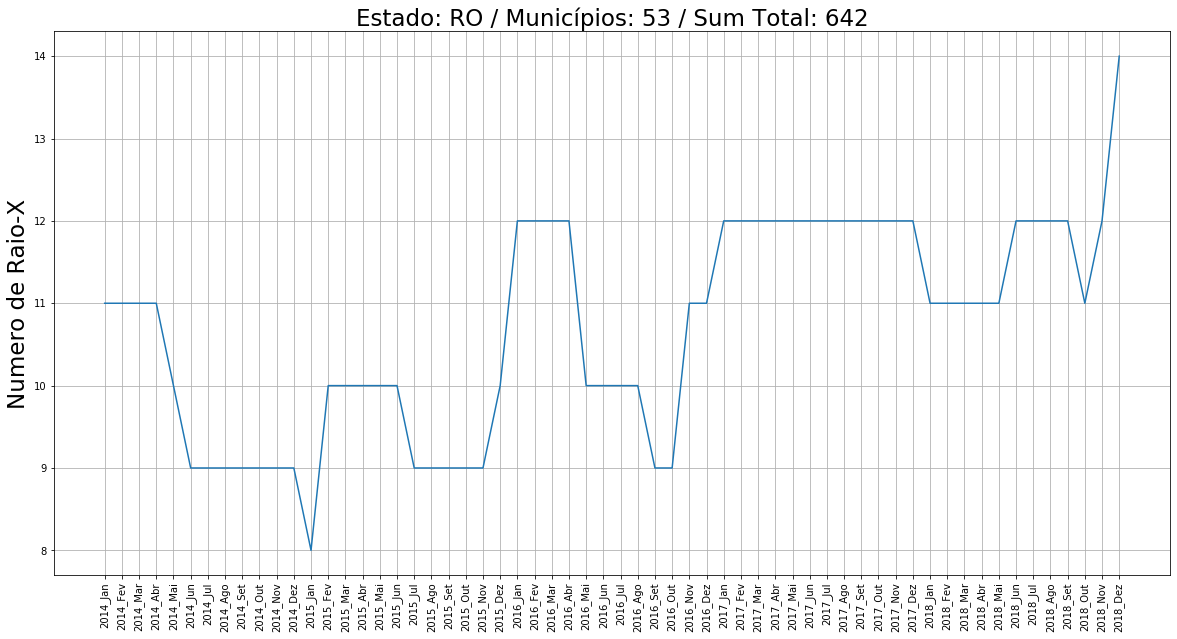

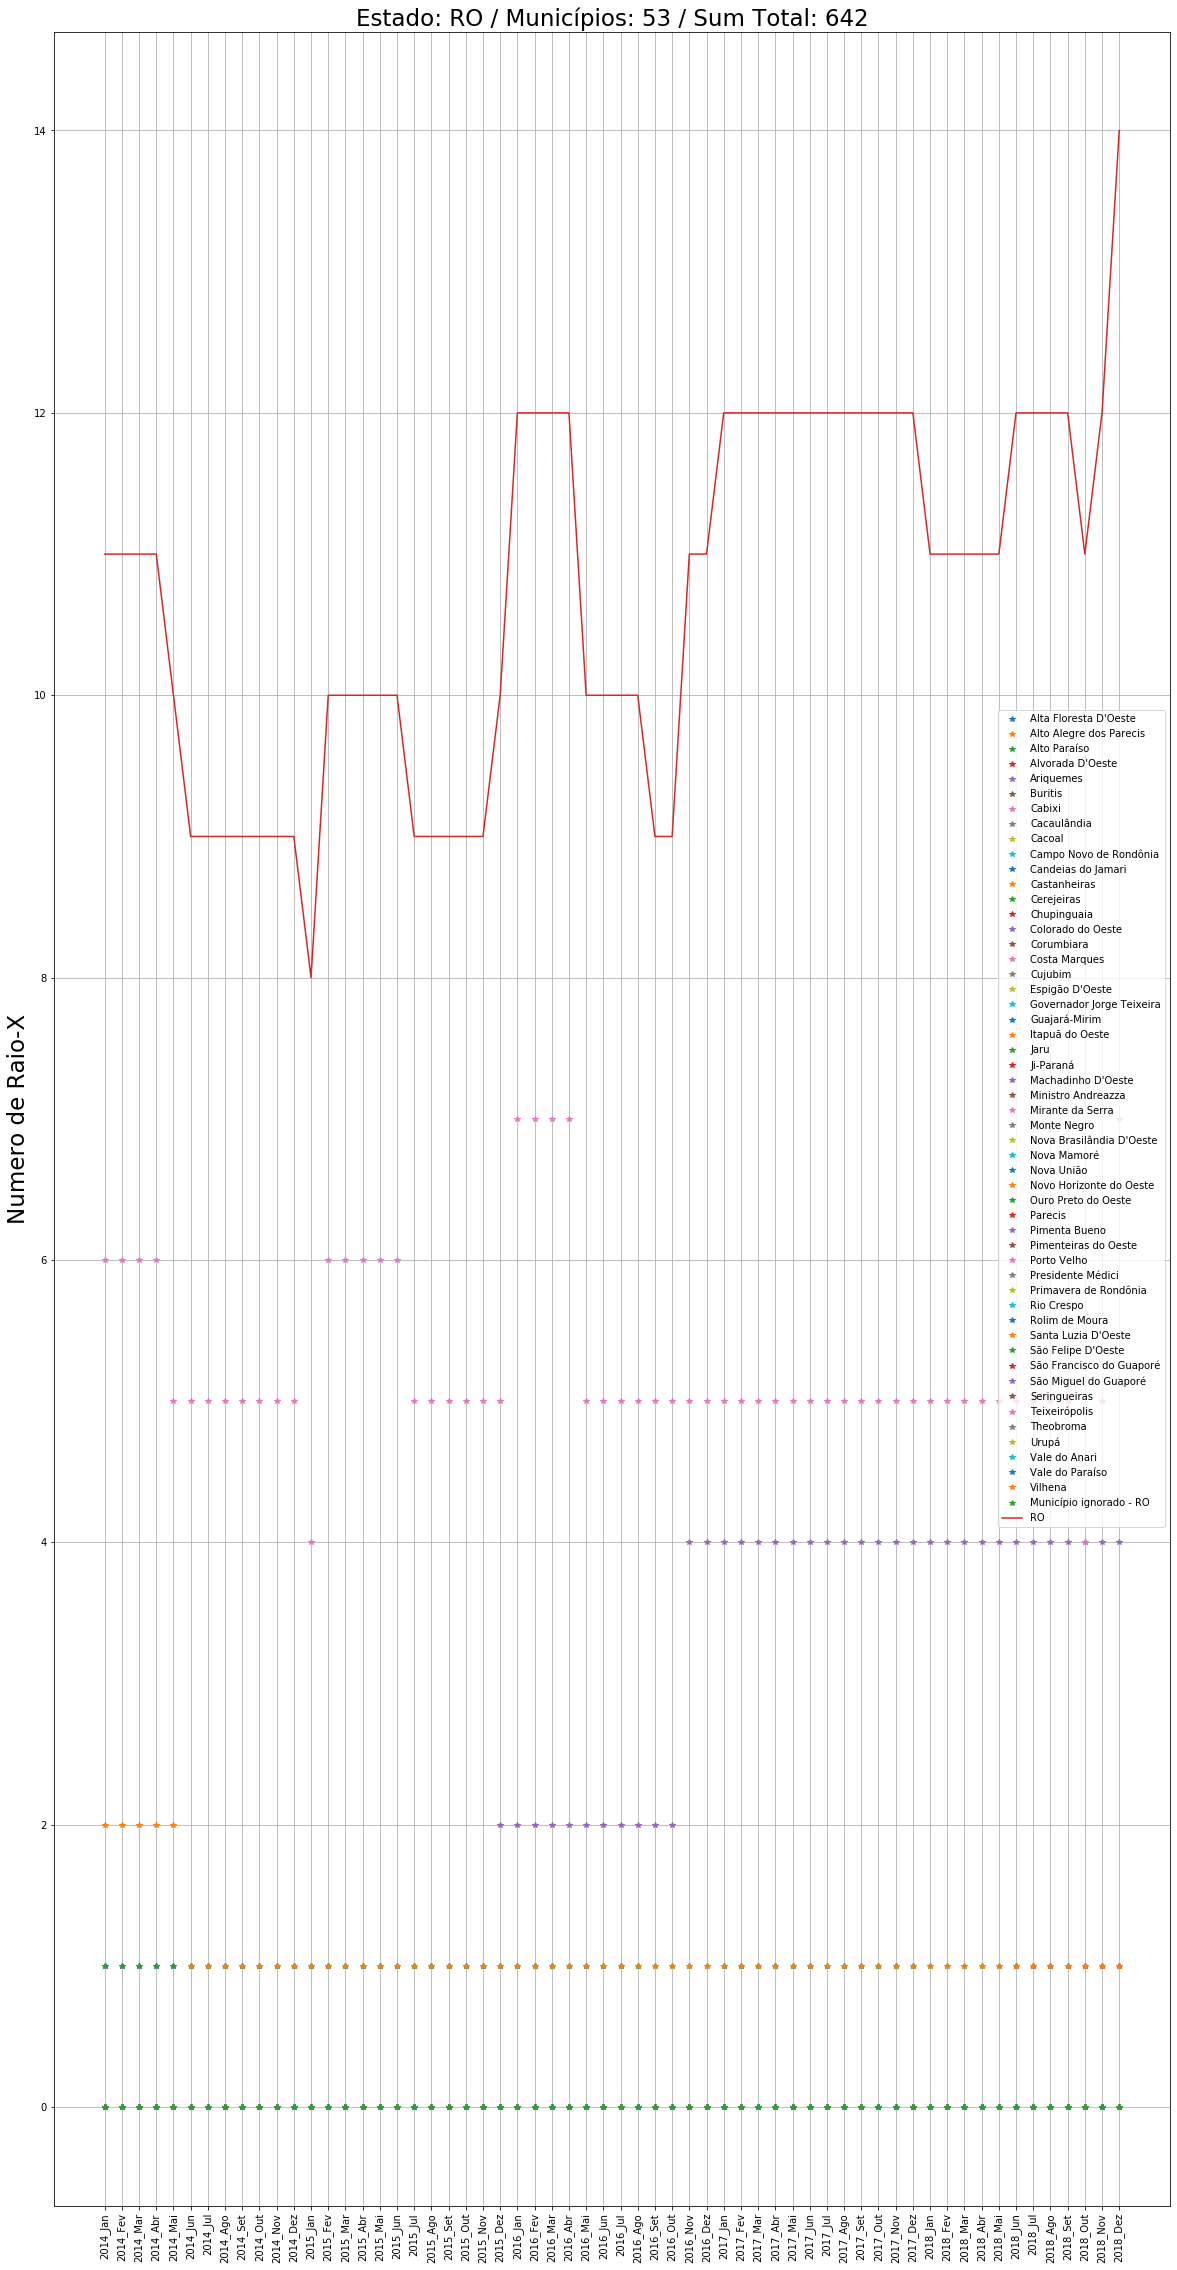

,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.173913,0.173913,0.173913,0.173913,0.173913,0.173913,0.173913,0.173913,0.173913,0.173913,...,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435
std,0.650327,0.650327,0.650327,0.650327,0.650327,0.650327,0.650327,0.650327,0.650327,0.650327,...,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


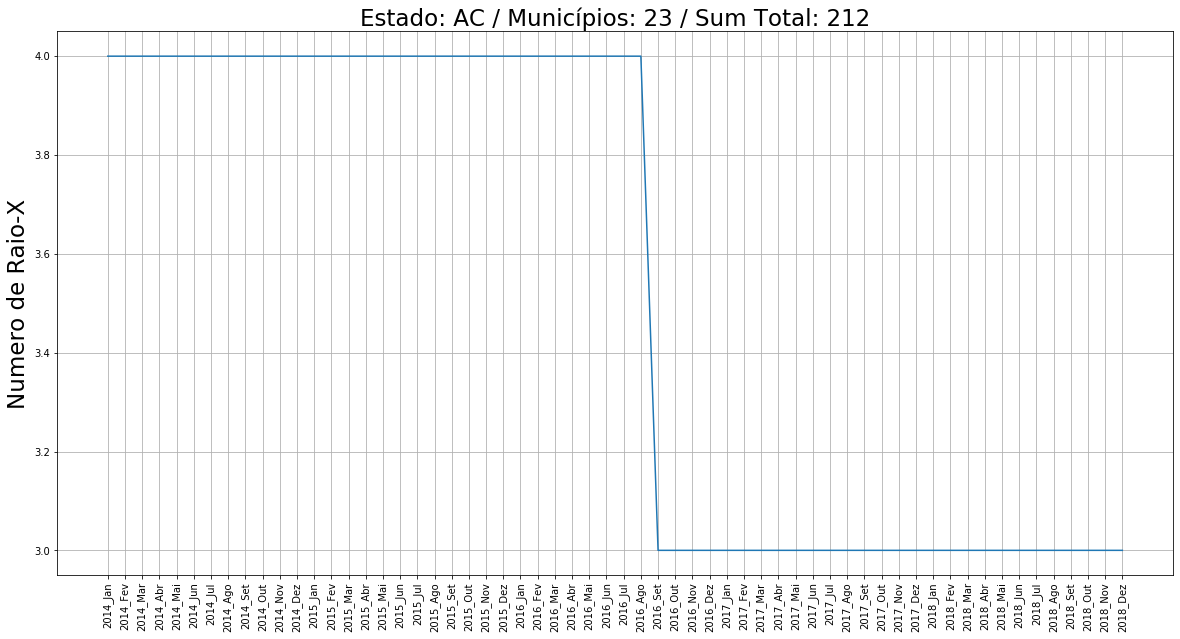

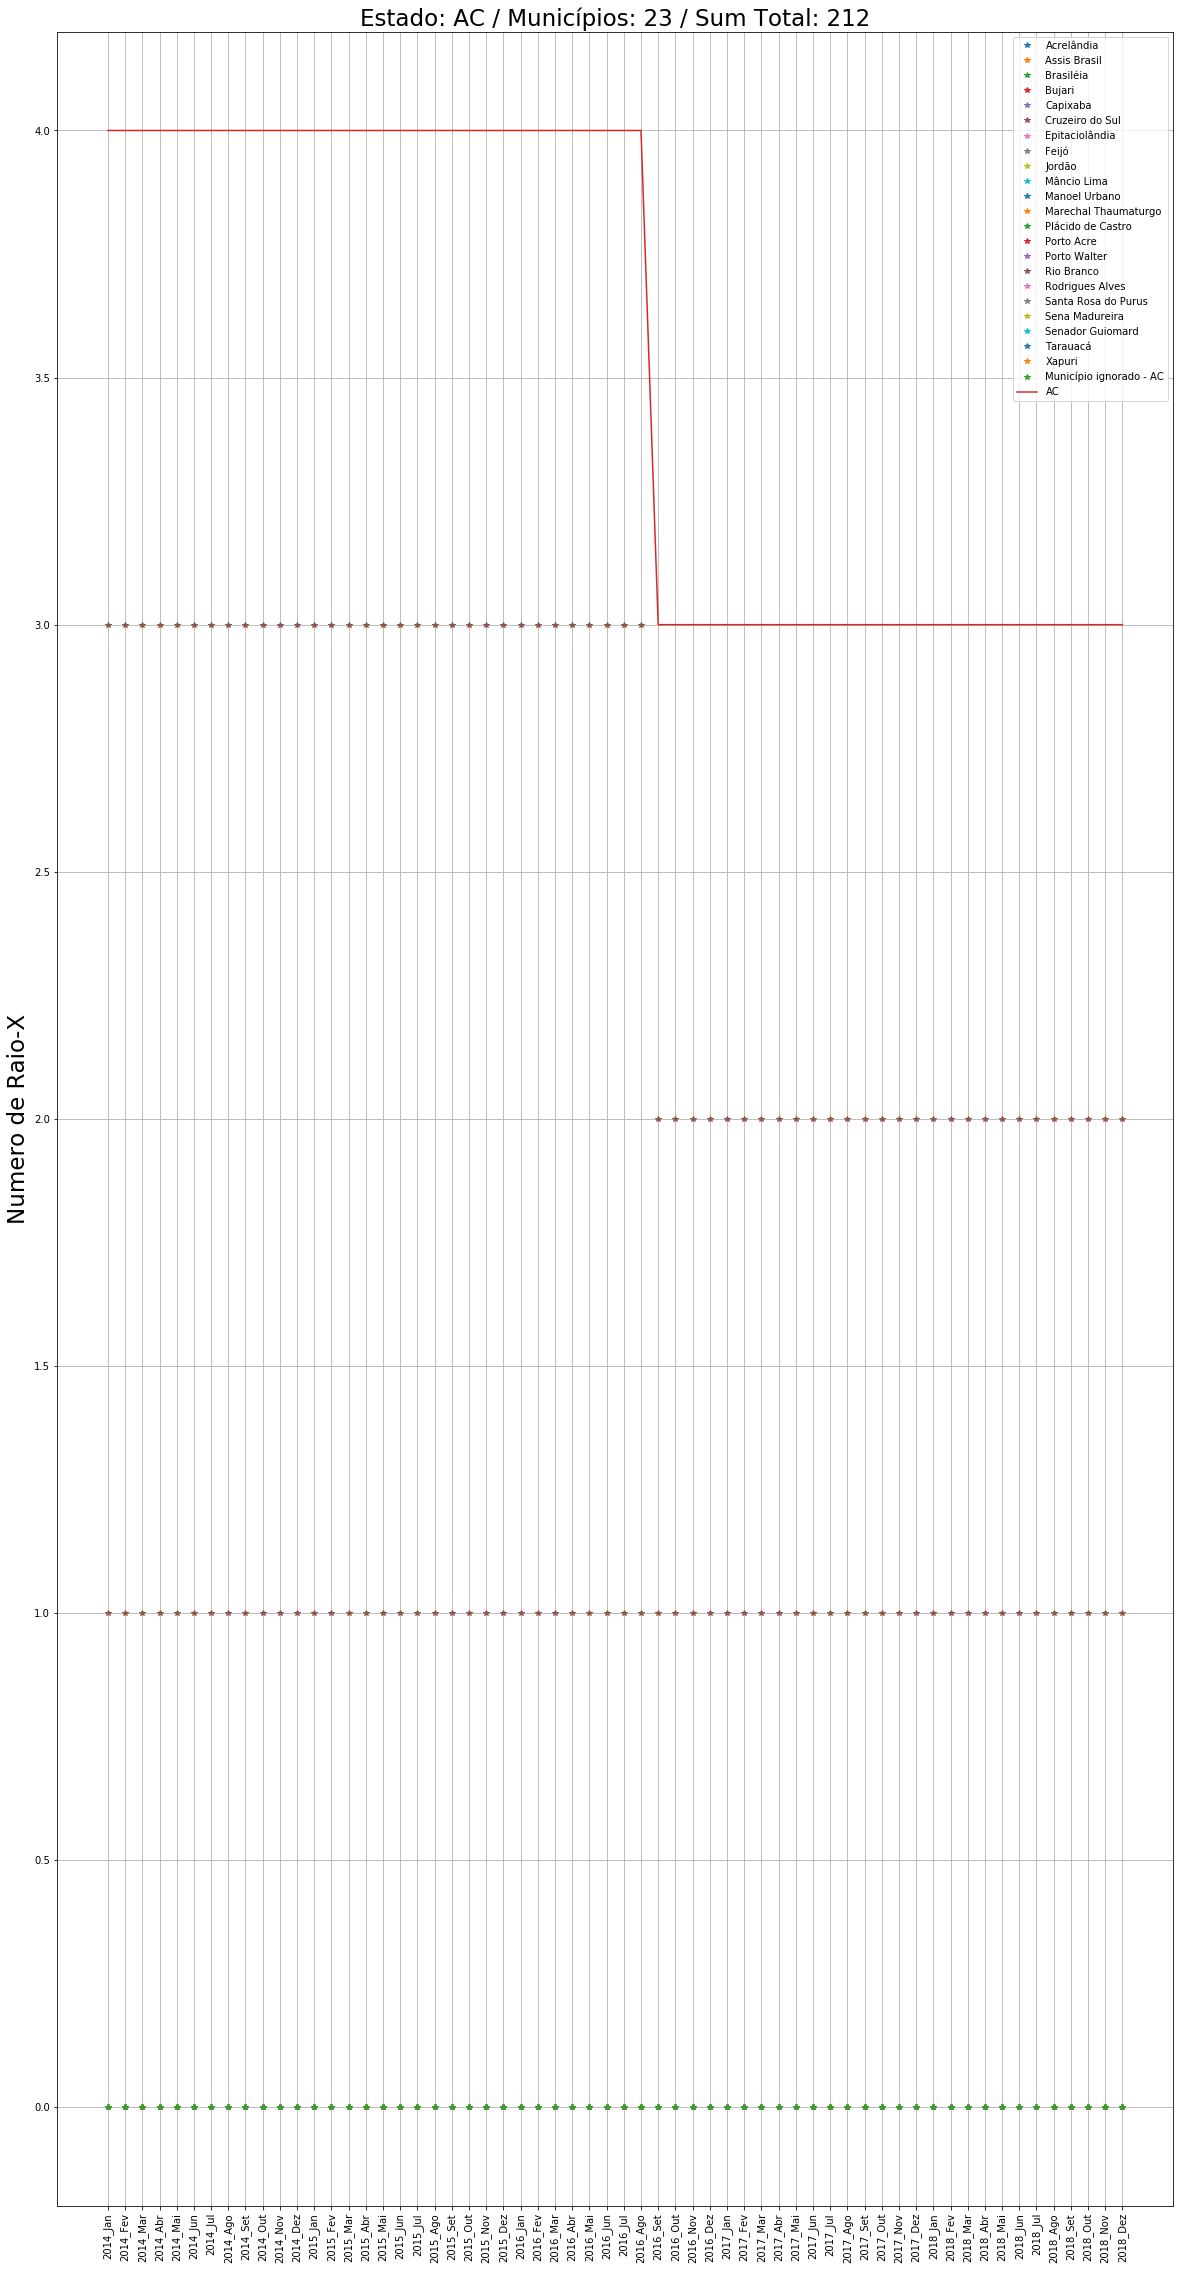

In [6]:
data_raiox = pd.read_csv('../data/RF- Raios X.csv', sep=';', skiprows=4, encoding='latin1')
data_raiox.columns
data_raiox.index
dis = False
aux = data_raiox.copy()
describe_anali(aux,dis)
aux = data_mamografos.copy()
new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
             '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
             '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
             '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
             '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']
name_y_label = 'Numero de Raio-X'
plot_RF(aux,new_names,name_y_label)

### RF - Tomógrafos Computadorizados

,Município,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,...,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez
0,110001 Alta Floresta D'Oeste,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,110037 Alto Alegre dos Parecis,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,110040 Alto Paraíso,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,110034 Alvorada D'Oeste,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,110002 Ariquemes,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,...,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez
count,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,...,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000
mean,0.561742,0.563883,0.565667,0.568879,0.572091,0.577088,0.579943,0.584226,0.590293,0.593505,...,0.687009,0.691292,0.698787,0.703069,0.708779,0.716274,0.720914,0.725910,0.729836,0.734118
std,21.086250,21.166171,21.232364,21.352085,21.472277,21.659559,21.766463,21.926863,22.153921,22.274038,...,25.780340,25.941442,26.221838,26.382603,26.597316,26.878641,27.054131,27.241816,27.388223,27.549387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1574.000000,1580.000000,1585.000000,1594.000000,1603.000000,1617.000000,1625.000000,1637.000000,1654.000000,1663.000000,...,1925.000000,1937.000000,1958.000000,1970.000000,1986.000000,2007.000000,2020.000000,2034.000000,2045.000000,2057.000000


,Names,Porcentagem Faltante
0,Município,0.0
1,2014/Jan,0.0
2,2014/Fev,0.0
3,2014/Mar,0.0
4,2014/Abr,0.0
...,...,...
56,2018/Ago,0.0
57,2018/Set,0.0
58,2018/Out,0.0
59,2018/Nov,0.0


,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.207547,0.207547,0.207547,0.207547,0.207547,0.207547,0.207547,0.207547,0.207547,0.207547,...,0.264151,0.264151,0.264151,0.264151,0.283019,0.283019,0.283019,0.283019,0.283019,0.301887
std,1.115597,1.115597,1.115597,1.115597,1.115597,1.115597,1.115597,1.115597,1.115597,1.115597,...,1.076871,1.162738,1.076871,1.076871,1.198996,1.198996,1.198996,1.198996,1.198996,1.324109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,7.000000,8.000000,7.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,9.000000


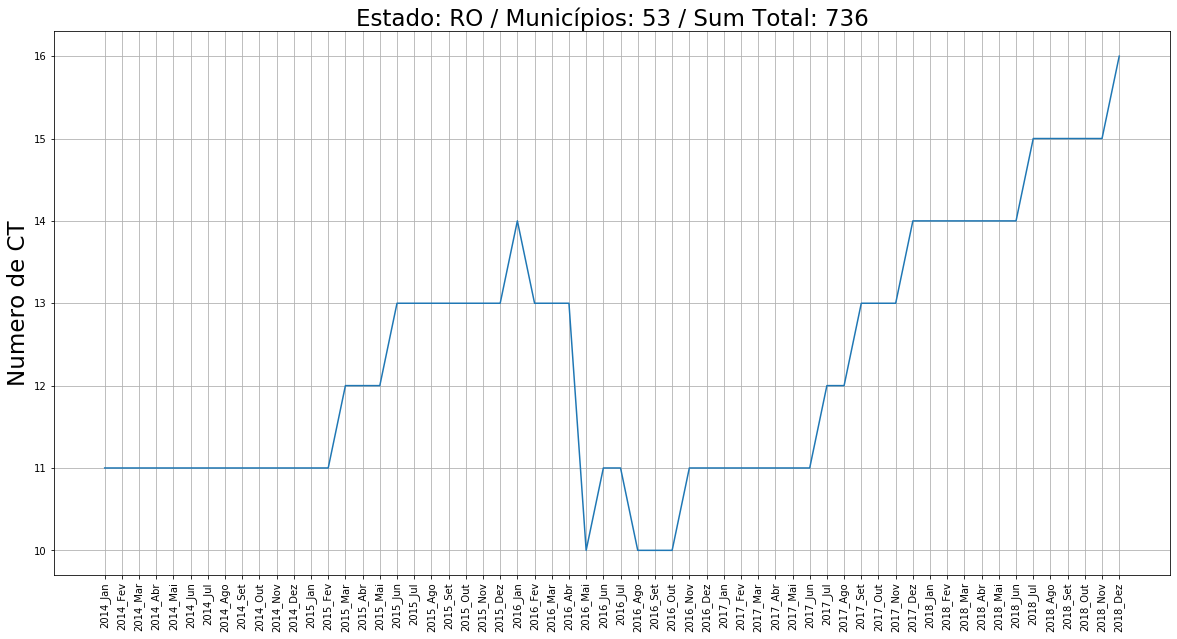

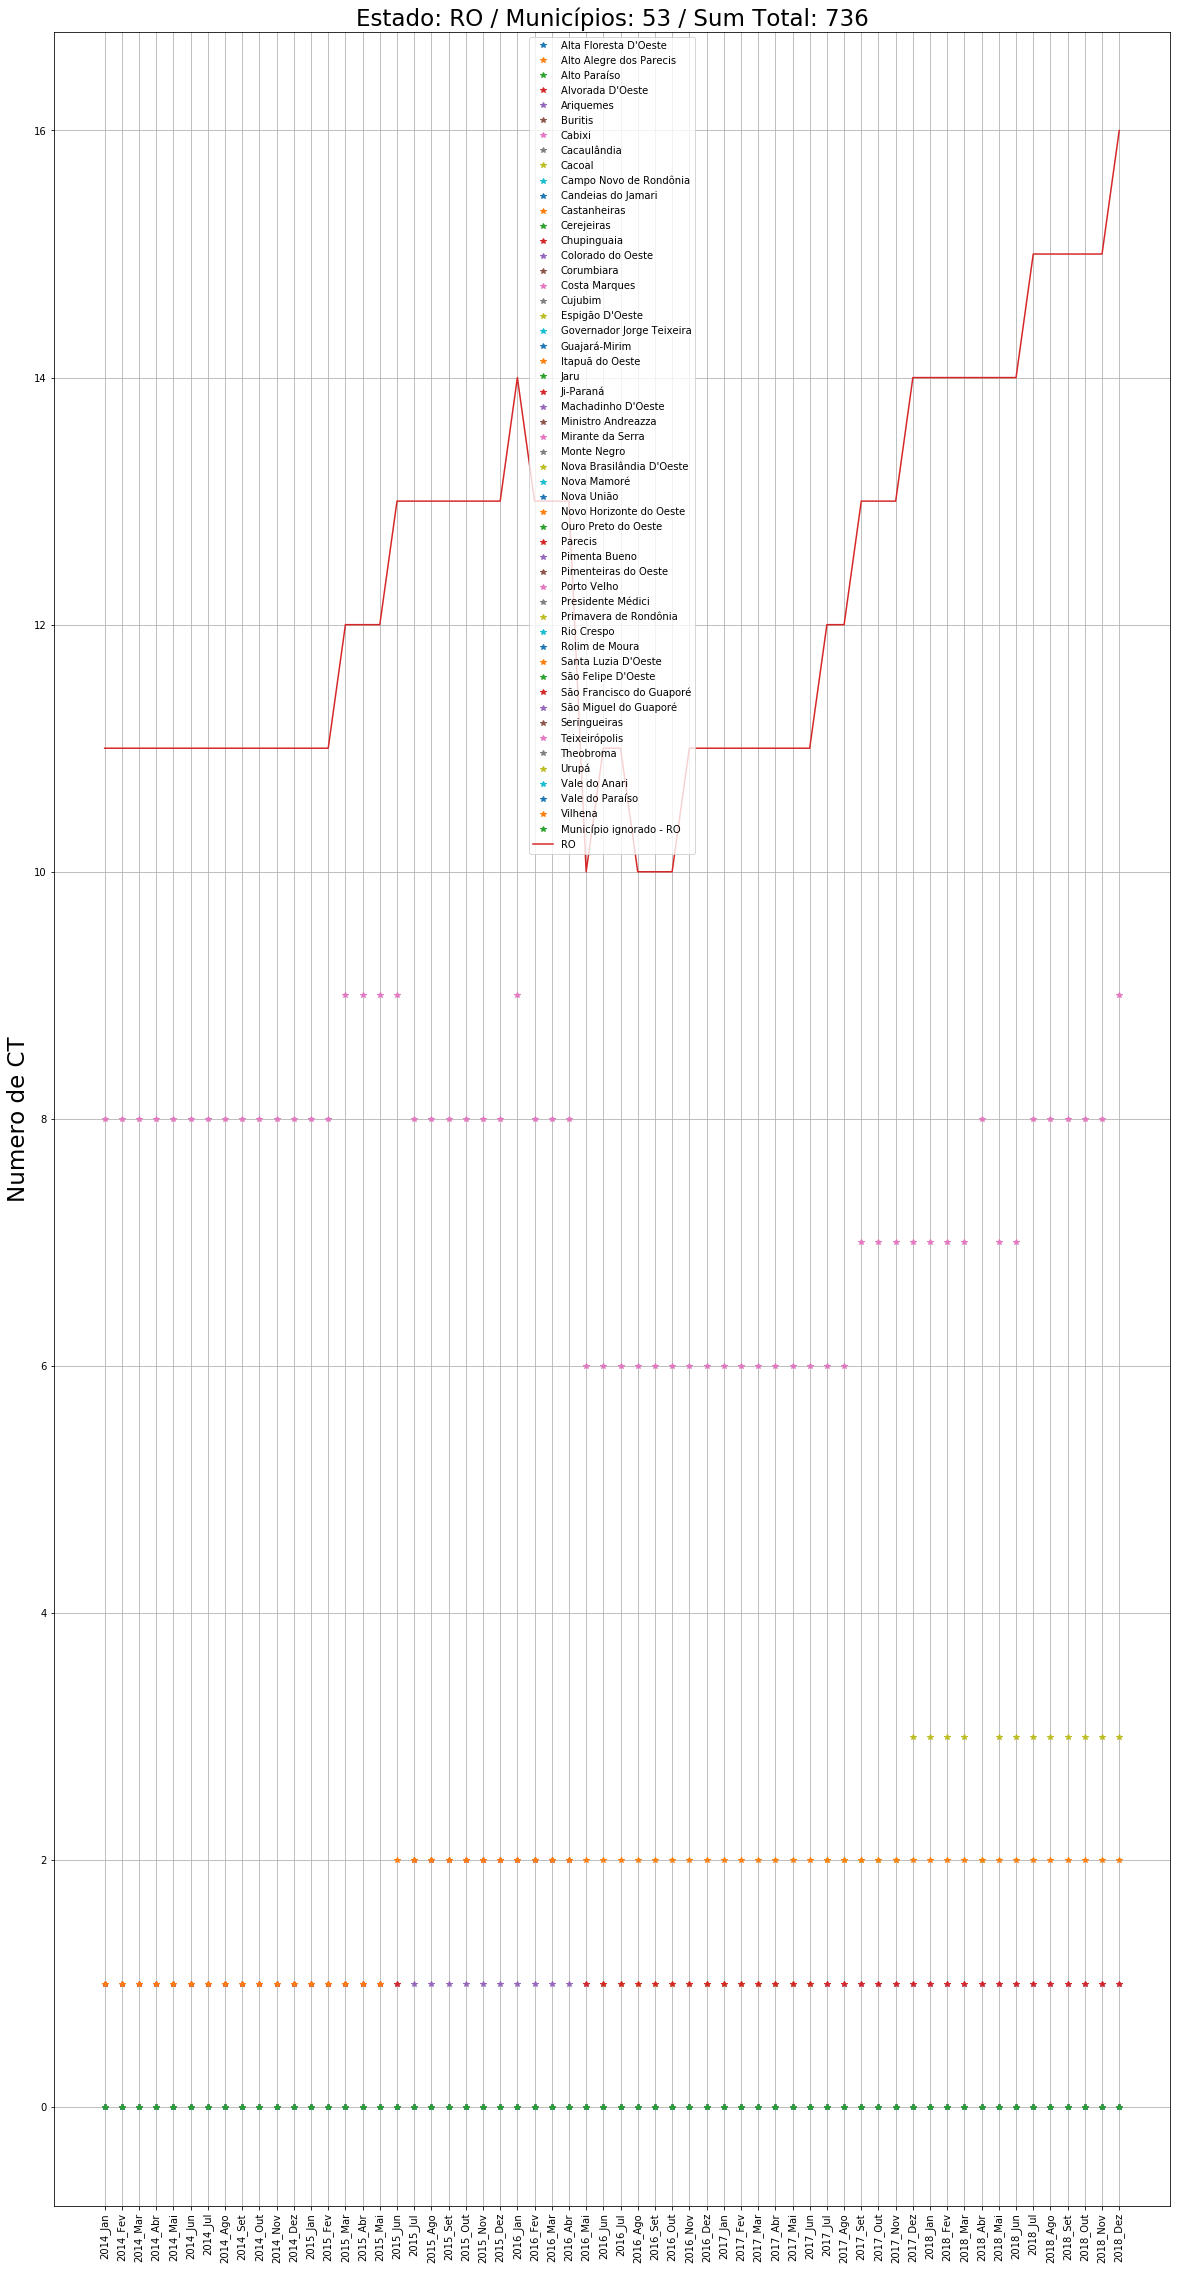

,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.130435,0.130435,0.130435,0.130435,0.130435,0.173913,0.173913,0.173913,0.173913,0.173913,...,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435
std,0.457697,0.457697,0.457697,0.457697,0.457697,0.650327,0.650327,0.650327,0.650327,0.650327,...,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


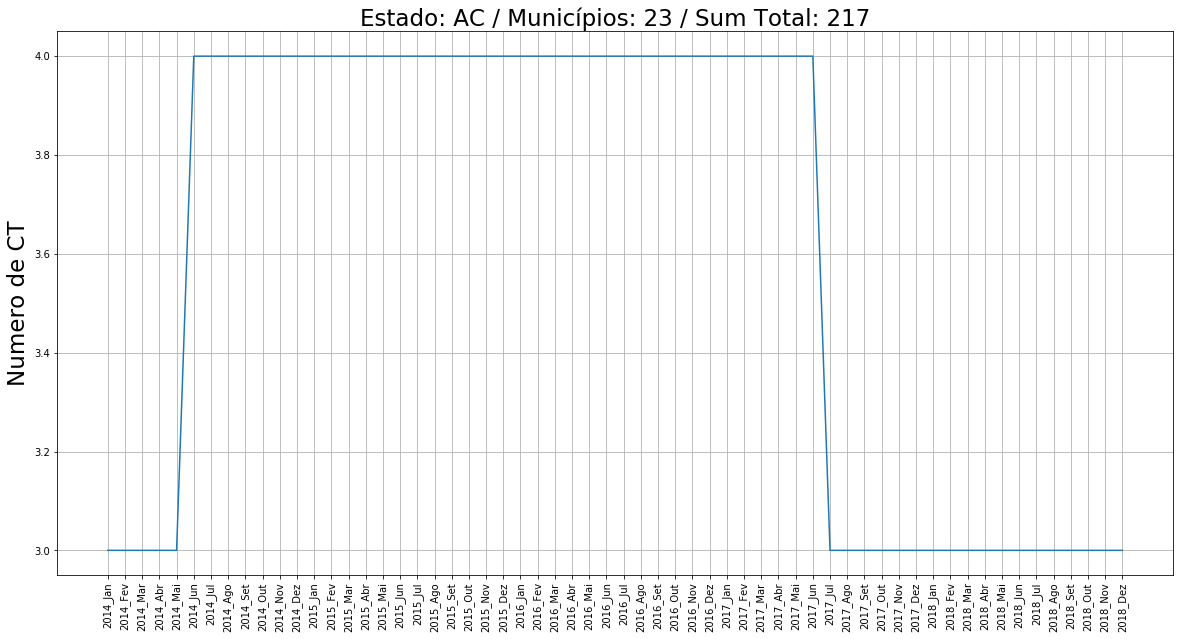

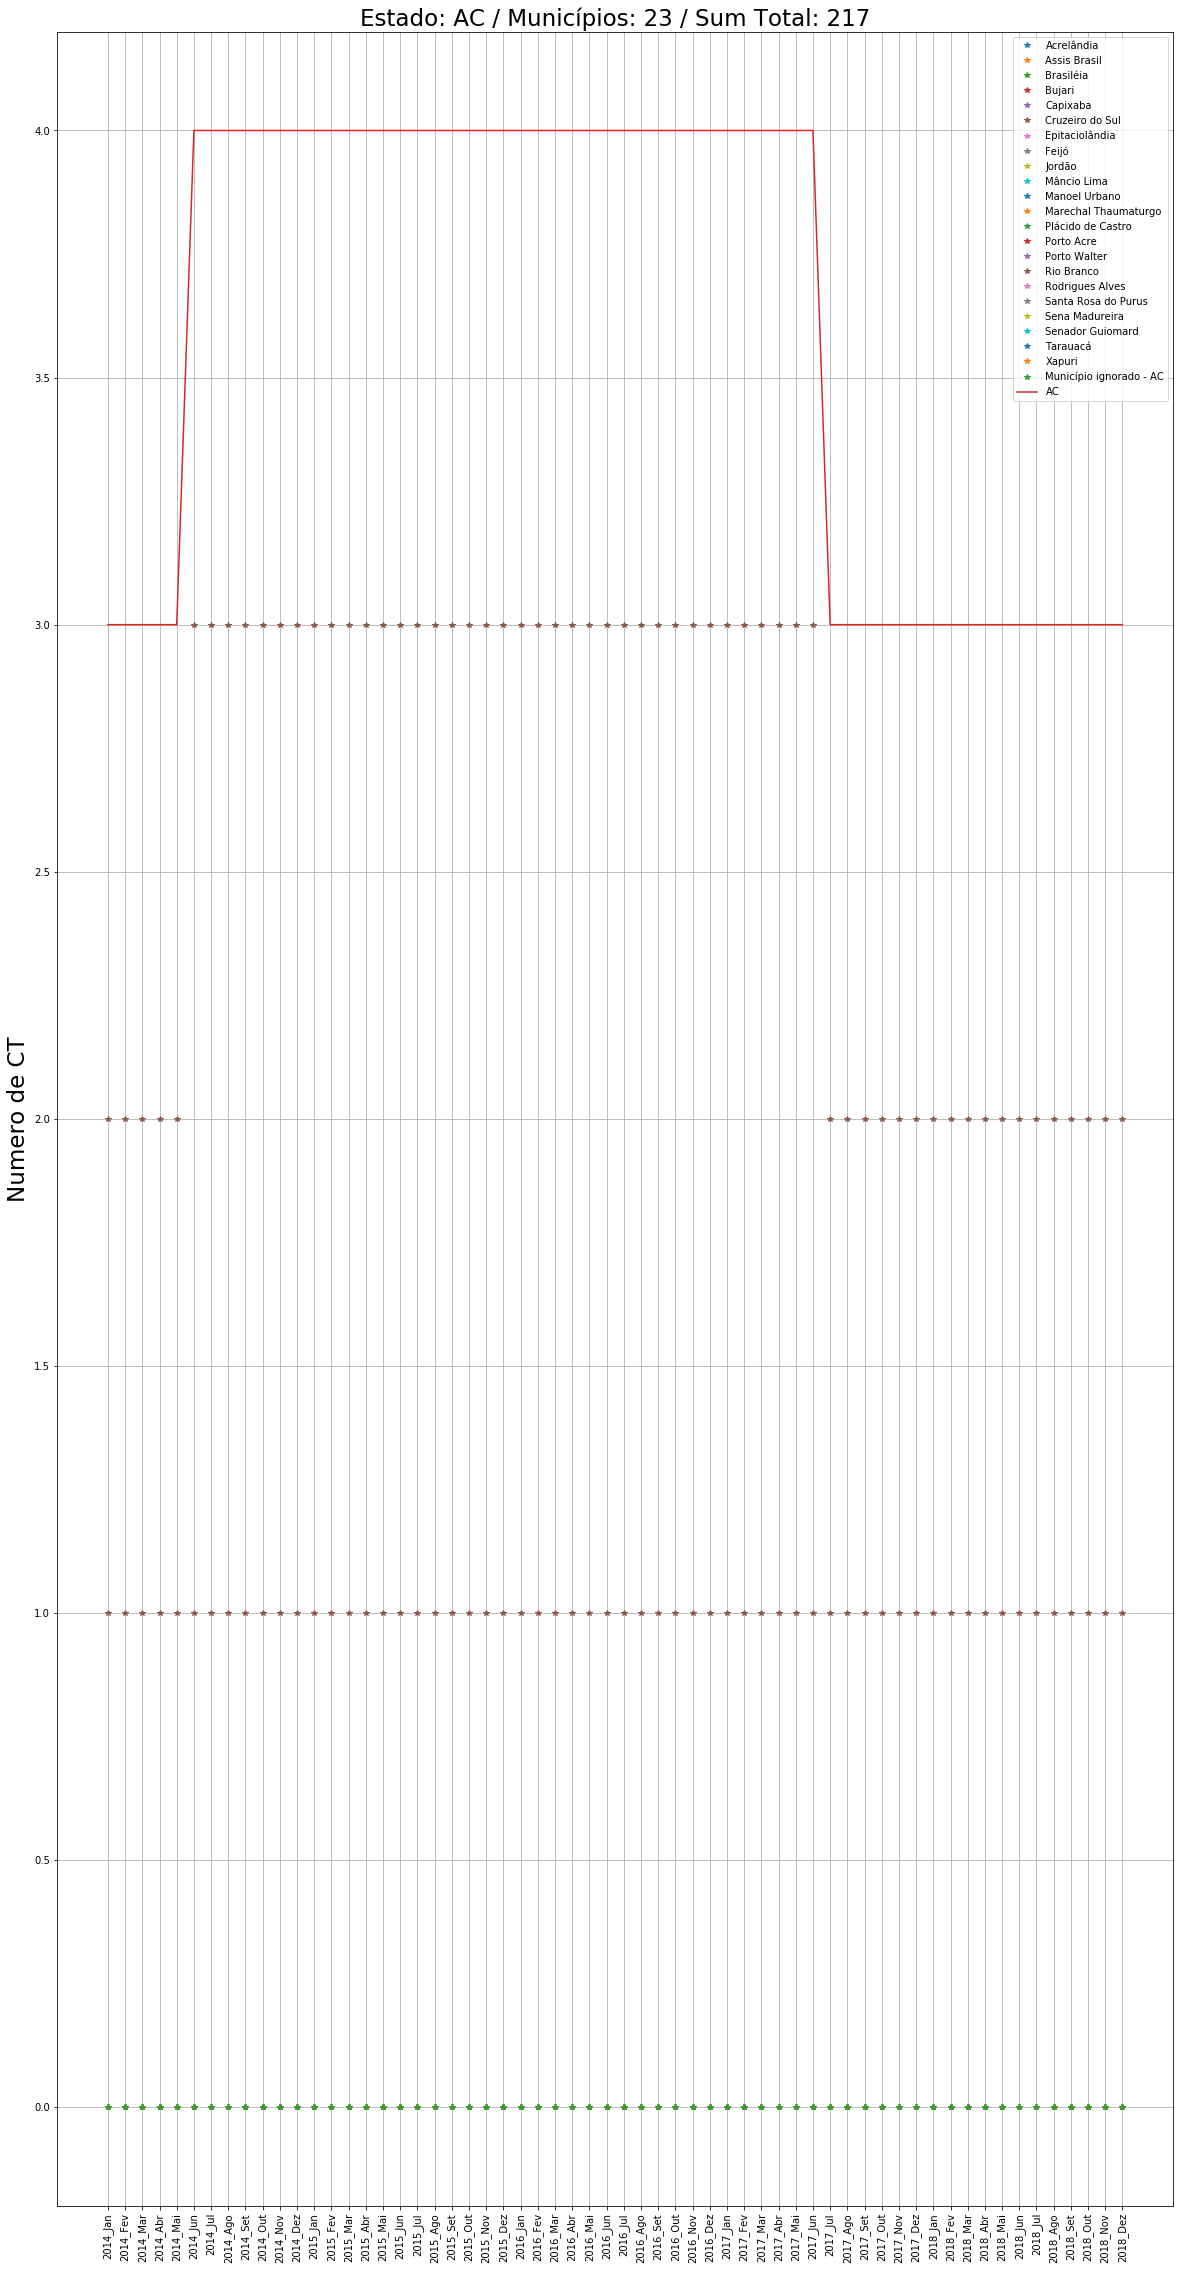

In [7]:
CT = pd.read_csv('../data/RF- Tomógrafos Computadorizados.csv', sep=';', skiprows=4, encoding='latin1')
CT.columns
CT.index
dis = False
aux = CT.copy()
describe_anali(aux,dis)
aux = CT.copy()
new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
             '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
             '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
             '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
             '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']
name_y_label = 'Numero de CT'
plot_RF(aux,new_names,name_y_label)

### RF - Ressonância Magnética

,Município,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,...,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez
0,110001 Alta Floresta D'Oeste,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,110037 Alto Alegre dos Parecis,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,110040 Alto Paraíso,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,110034 Alvorada D'Oeste,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,110002 Ariquemes,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,...,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez
count,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,...,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000
mean,0.211278,0.211991,0.214490,0.218059,0.221984,0.225196,0.229836,0.232334,0.234832,0.238401,...,0.321913,0.324768,0.329408,0.332976,0.335832,0.337973,0.340828,0.342969,0.343683,0.344754
std,7.941782,7.968595,8.062271,8.195927,8.343635,8.463945,8.637627,8.731151,8.824654,8.958842,...,12.094350,12.201510,12.375108,12.508649,12.616234,12.696852,12.805196,12.885171,12.911111,12.951218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,592.000000,594.000000,601.000000,611.000000,622.000000,631.000000,644.000000,651.000000,658.000000,668.000000,...,902.000000,910.000000,923.000000,933.000000,941.000000,947.000000,955.000000,961.000000,963.000000,966.000000


,Names,Porcentagem Faltante
0,Município,0.0
1,2014/Jan,0.0
2,2014/Fev,0.0
3,2014/Mar,0.0
4,2014/Abr,0.0
...,...,...
56,2018/Ago,0.0
57,2018/Set,0.0
58,2018/Out,0.0
59,2018/Nov,0.0


,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.094340,0.094340,0.094340,0.094340,0.132075,0.132075,0.132075,0.132075,0.132075,0.132075,...,0.207547,0.207547,0.188679,0.188679,0.207547,0.207547,0.207547,0.207547,0.207547,0.226415
std,0.449964,0.449964,0.449964,0.449964,0.589581,0.589581,0.589581,0.589581,0.589581,0.589581,...,1.006870,1.006870,0.878298,0.878298,1.006870,1.006870,1.006870,1.006870,1.006870,1.137499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000


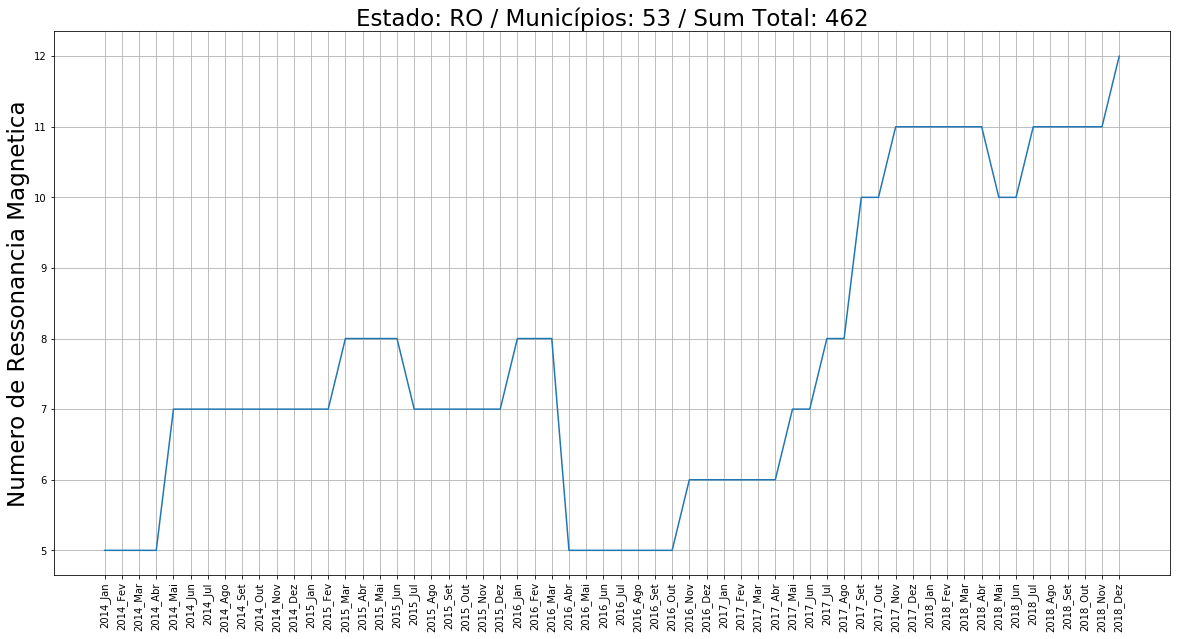

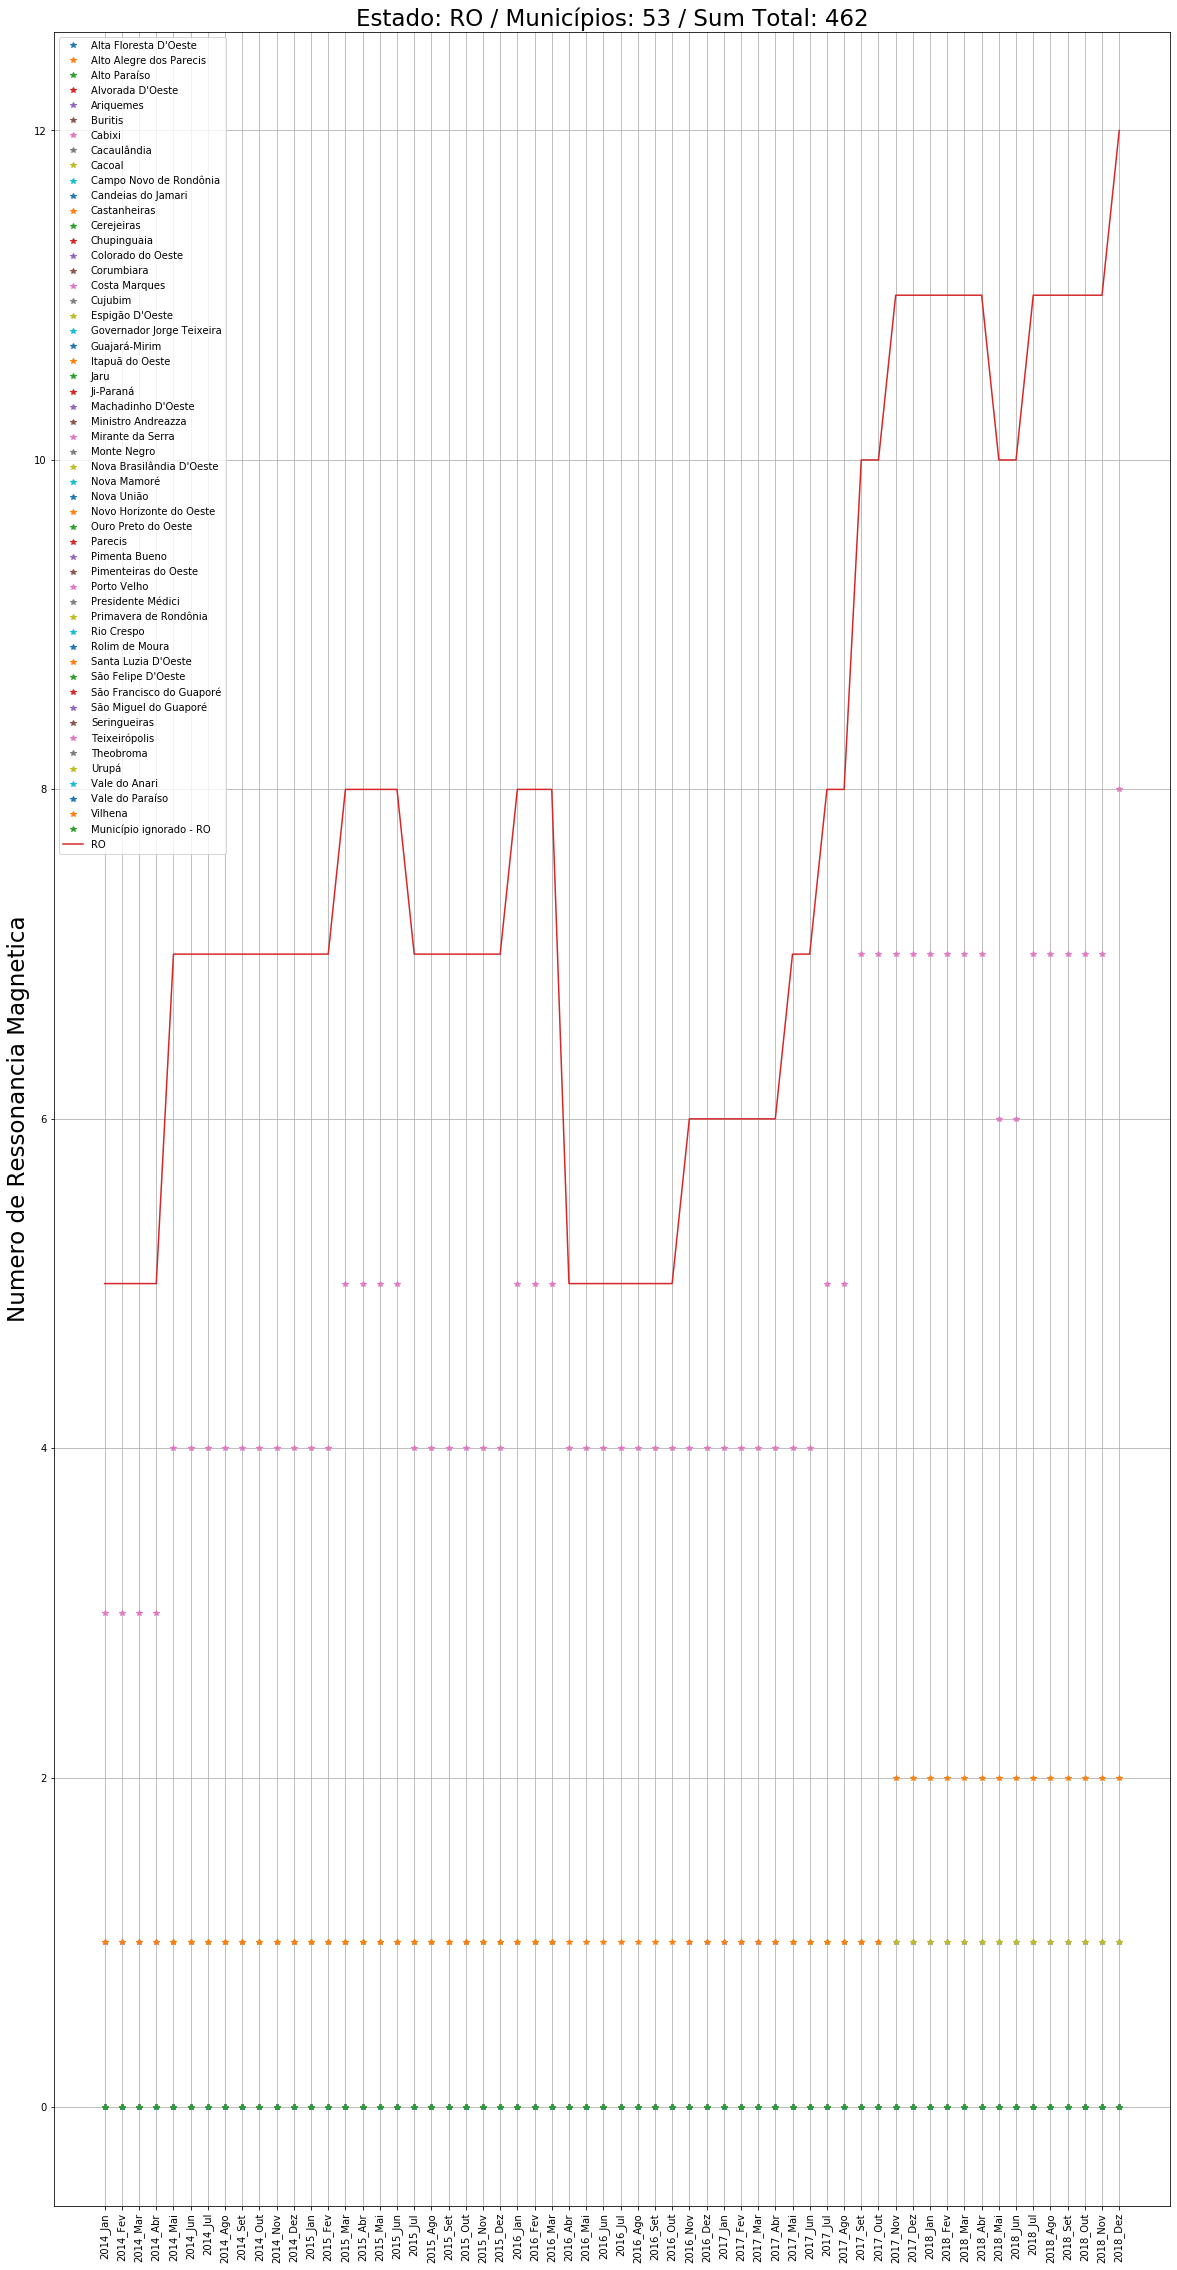

,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.086957,0.086957,0.086957,0.086957,0.086957,0.086957,0.086957,0.086957,0.086957,0.086957
std,0.208514,0.208514,0.208514,0.208514,0.208514,0.208514,0.208514,0.208514,0.208514,0.208514,...,0.417029,0.417029,0.417029,0.417029,0.417029,0.417029,0.417029,0.417029,0.417029,0.417029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


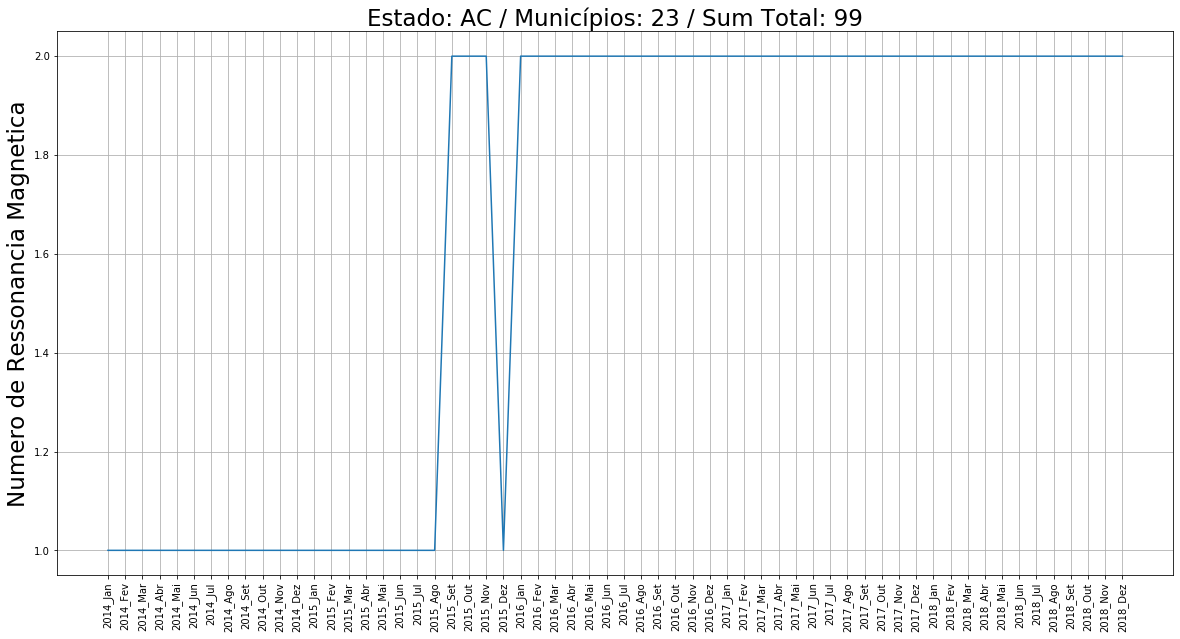

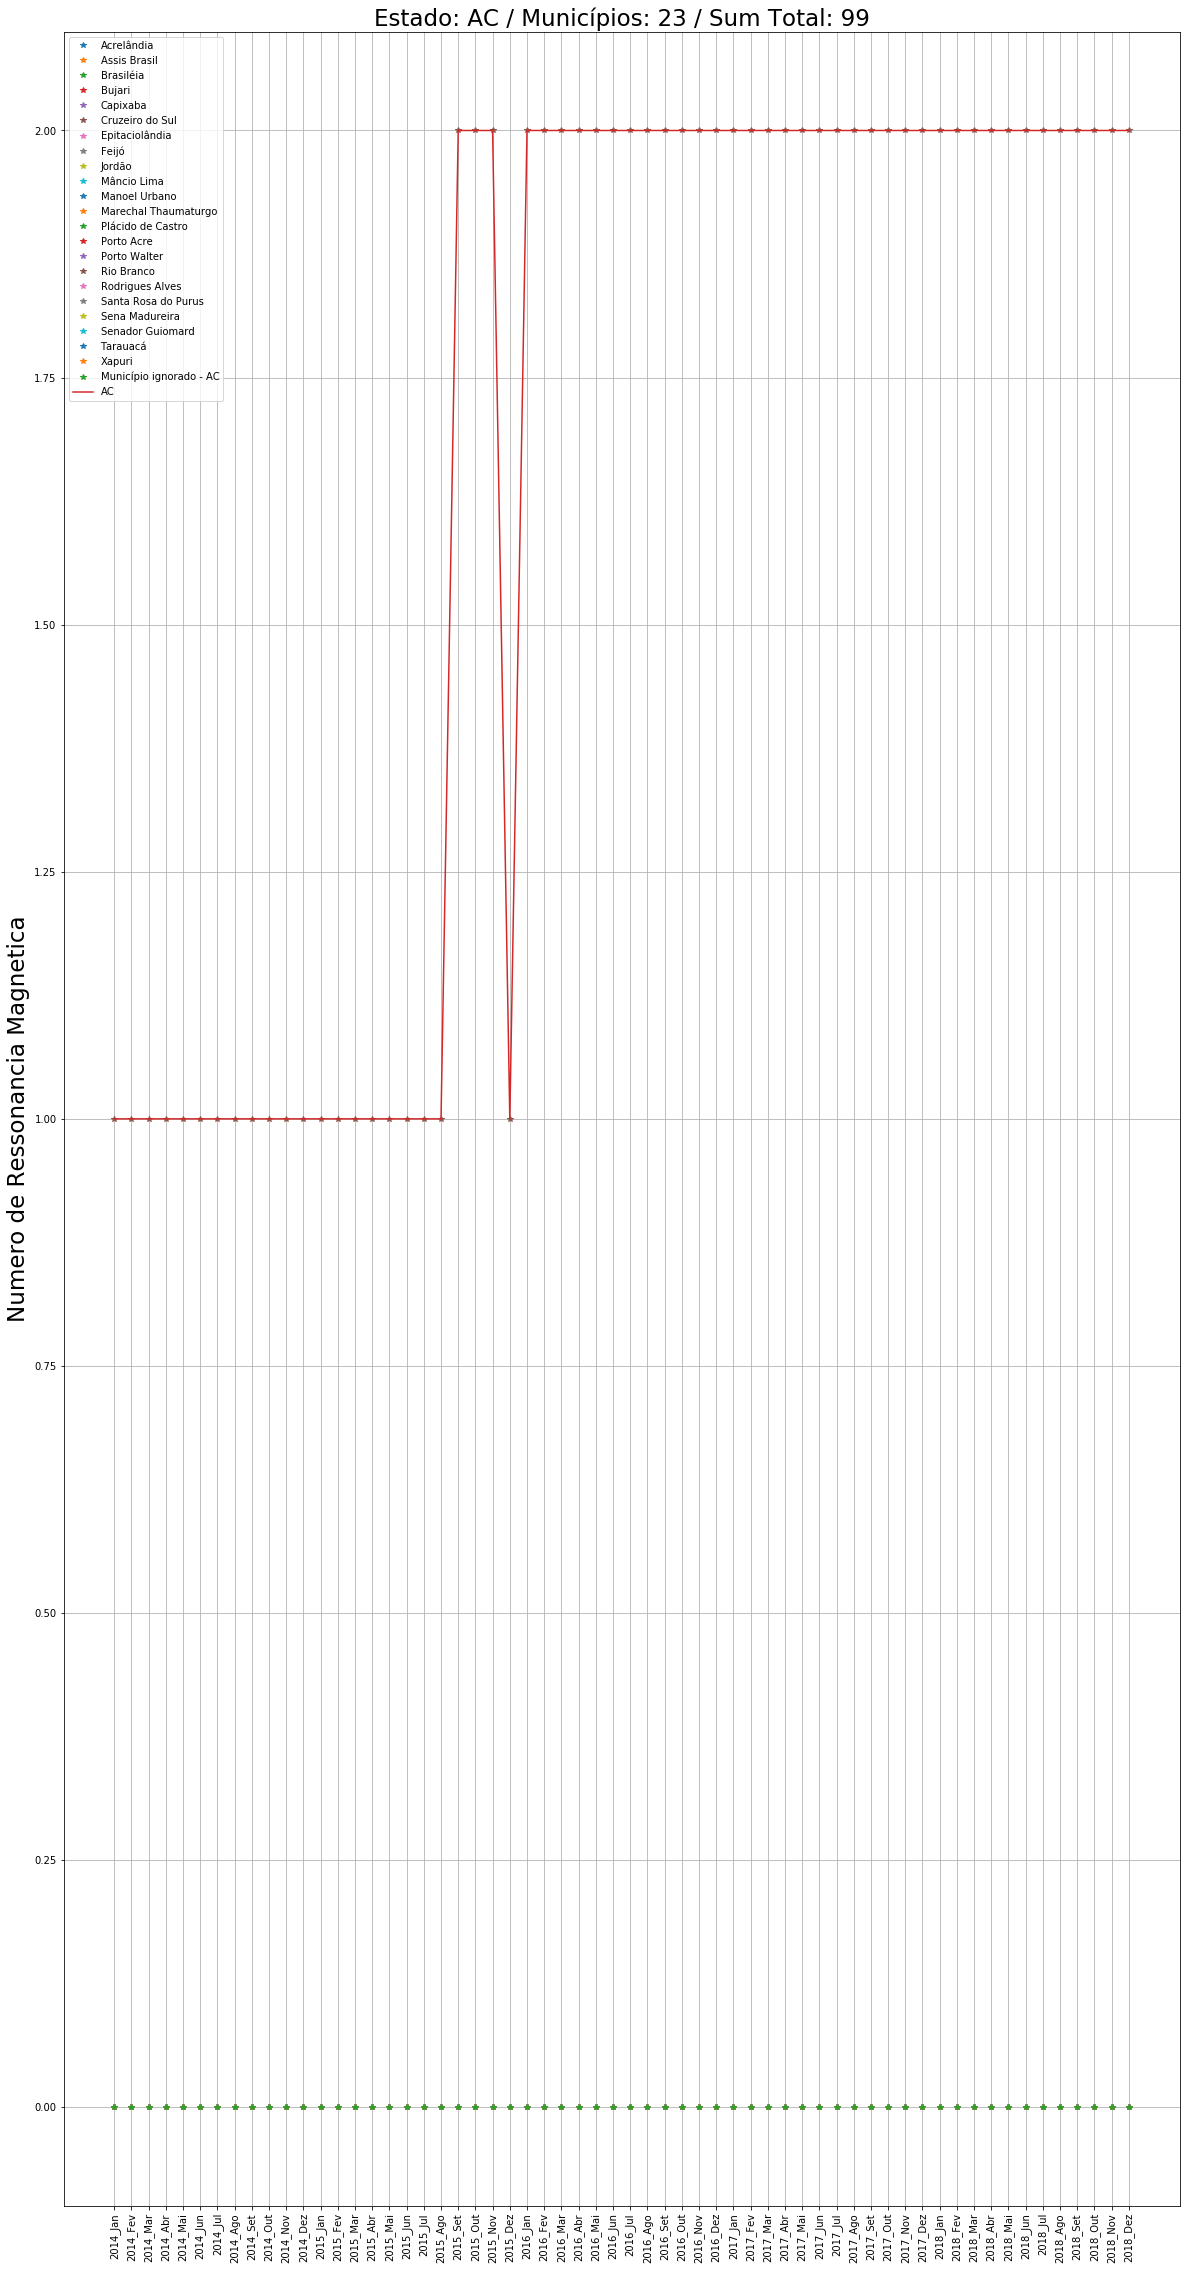

In [8]:
data = pd.read_csv('../data/RF-Ressonância Magnética.csv', sep=';', skiprows=4, encoding='latin1')
data.columns
data.index
dis = False
aux = data.copy()
describe_anali(aux,dis)
aux = data.copy()
new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
             '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
             '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
             '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
             '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']
name_y_label = 'Numero de Ressonancia Magnetica'
plot_RF(aux,new_names,name_y_label)

### RF - Enfermeiros

,Município,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,...,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez
0,110001 Alta Floresta D'Oeste,14,14,16,16,16,16,16,16,16,...,20,20,20,20,20,20,19,19,19,19
1,110037 Alto Alegre dos Parecis,6,6,6,6,6,6,6,7,7,...,8,10,10,10,10,9,9,12,11,11
2,110040 Alto Paraíso,7,7,7,7,8,8,8,8,9,...,9,9,8,8,7,10,10,10,10,9
3,110034 Alvorada D'Oeste,10,10,10,10,11,10,10,10,10,...,12,12,12,12,12,13,14,14,13,13
4,110002 Ariquemes,54,54,55,53,54,55,54,56,56,...,82,79,81,84,87,87,87,88,85,87


,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,...,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez
count,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,...,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000
mean,62.982156,63.259814,63.989650,64.491435,65.405782,65.971092,66.861884,67.542827,68.517844,69.183797,...,85.500000,86.095289,86.546752,86.999643,87.712348,88.400428,88.923269,89.022127,89.530335,89.856174
std,2374.366961,2384.490072,2412.050559,2430.919178,2465.235304,2486.481257,2520.262331,2545.846301,2583.340437,2608.454920,...,3222.902649,3245.378692,3262.488202,3279.395876,3306.470226,3332.232698,3351.842494,3355.064165,3374.368252,3386.577092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,16.000000,16.000000,16.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
max,176476.000000,177254.000000,179299.000000,180705.000000,183267.000000,184851.000000,187347.000000,189255.000000,191987.000000,193853.000000,...,239571.000000,241239.000000,242504.000000,243773.000000,245770.000000,247698.000000,249163.000000,249440.000000,250864.000000,251777.000000


,Names,Porcentagem Faltante
0,Município,0.0
1,2014/Jan,0.0
2,2014/Fev,0.0
3,2014/Mar,0.0
4,2014/Abr,0.0
...,...,...
56,2018/Ago,0.0
57,2018/Set,0.0
58,2018/Out,0.0
59,2018/Nov,0.0


,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,21.716981,21.905660,22.169811,22.169811,22.358491,22.584906,22.867925,23.207547,23.377358,23.547170,...,32.188679,32.471698,32.056604,32.301887,33.433962,33.490566,33.886792,33.962264,34.150943,34.075472
std,67.978327,69.294318,69.856924,69.889125,69.758952,69.933879,69.972807,70.780907,71.199672,71.383462,...,99.233806,101.612121,97.284953,97.600754,103.716980,103.652827,104.041904,104.190647,105.825400,105.812034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
50%,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000,10.000000,9.000000
75%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,14.000000,14.000000,...,19.000000,20.000000,20.000000,20.000000,20.000000,20.000000,19.000000,19.000000,20.000000,21.000000
max,492.000000,501.000000,505.000000,505.000000,505.000000,505.000000,506.000000,512.000000,515.000000,516.000000,...,709.000000,728.000000,695.000000,697.000000,743.000000,743.000000,744.000000,743.000000,755.000000,754.000000


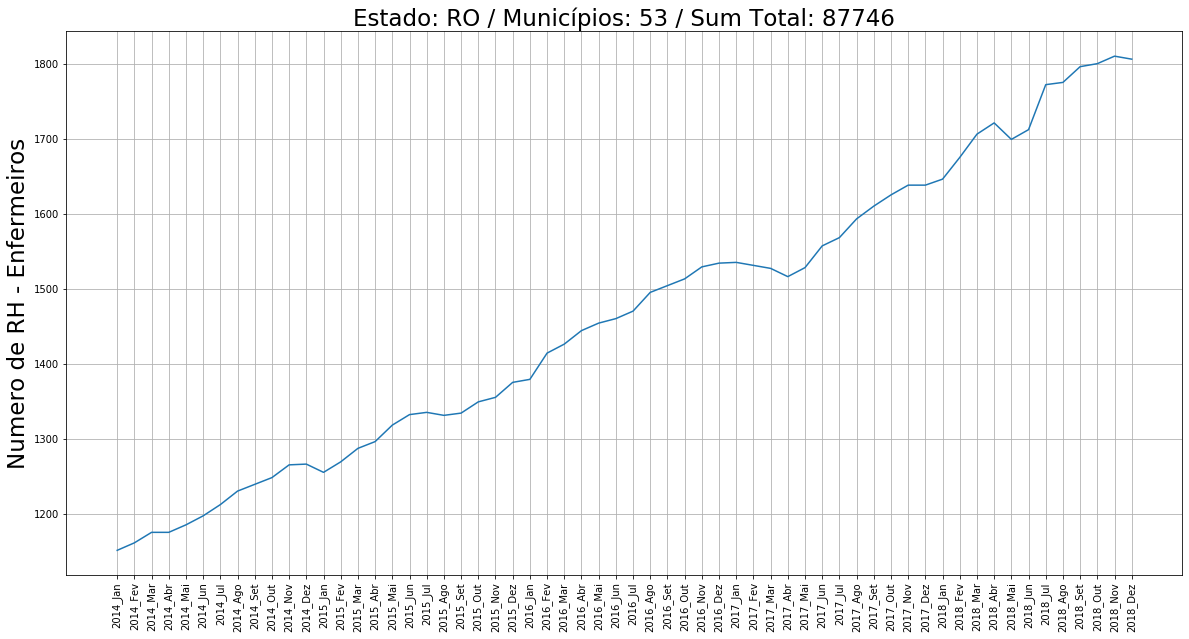

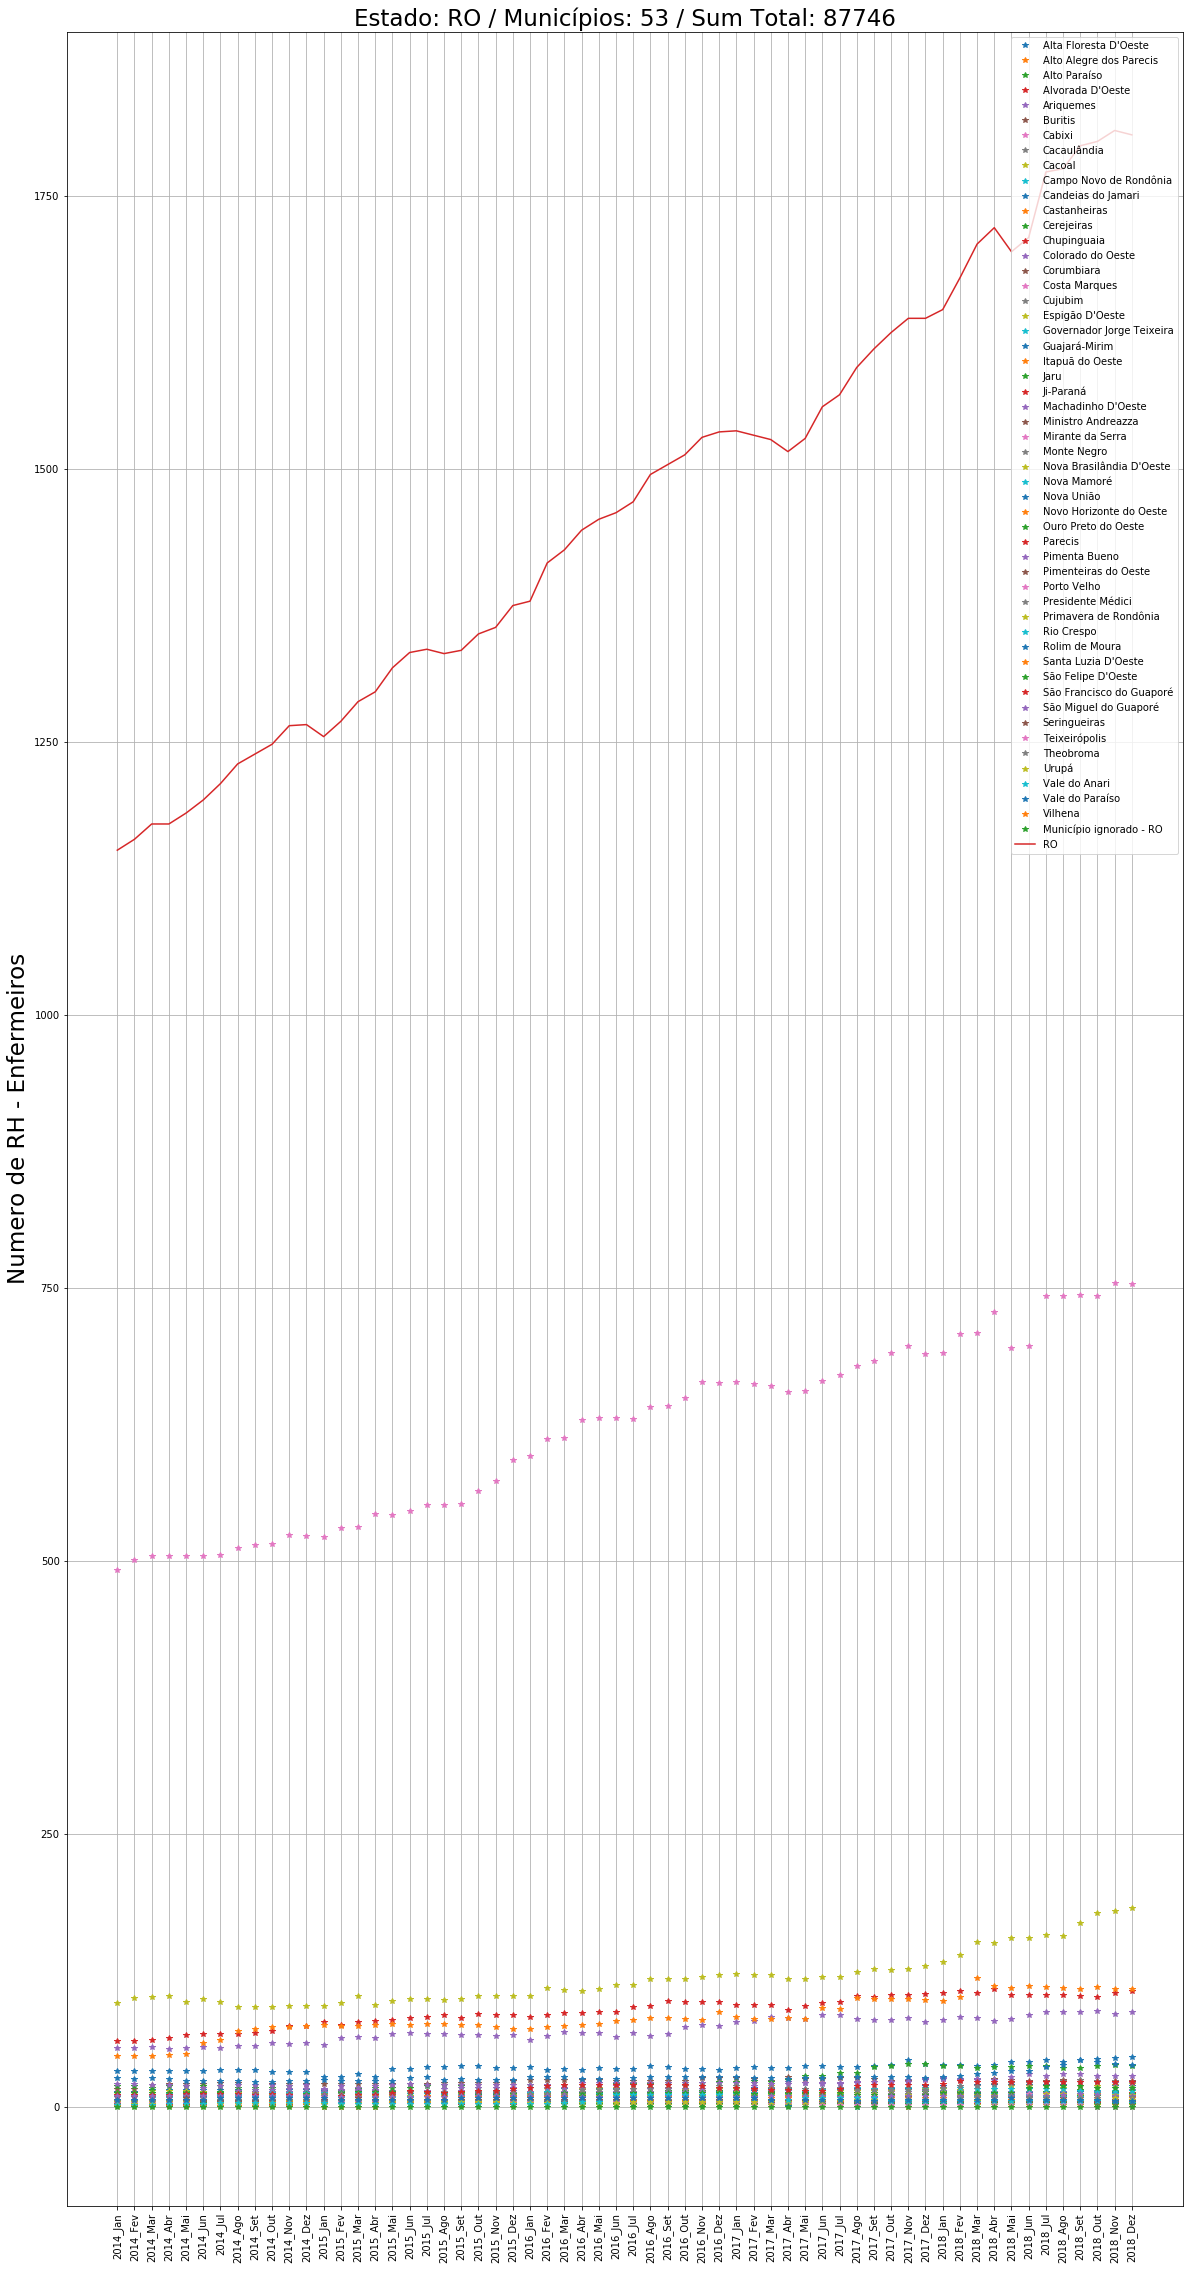

,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,32.173913,32.000000,32.260870,32.304348,33.173913,34.173913,34.695652,35.521739,36.043478,36.173913,...,41.739130,42.130435,42.130435,42.217391,42.260870,42.521739,43.000000,43.173913,43.217391,43.173913
std,84.370208,83.223685,84.172019,83.676017,86.892123,89.435936,90.313311,93.557406,95.469404,95.115553,...,116.198583,116.495534,117.086722,117.481510,117.808094,118.353043,120.428779,121.215305,120.613943,121.003250
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.500000,6.500000,6.500000,7.000000,7.000000,7.500000,7.500000,7.000000,7.000000,7.000000,...,8.000000,7.500000,7.500000,7.500000,8.000000,8.000000,8.000000,7.500000,7.500000,7.500000
50%,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000,10.000000,10.000000,...,12.000000,10.000000,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,12.000000,11.000000
75%,18.000000,18.000000,18.000000,17.000000,18.000000,18.500000,18.500000,18.500000,18.500000,18.500000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.500000,19.500000,20.500000,19.500000
max,409.000000,403.000000,408.000000,405.000000,421.000000,433.000000,437.000000,453.000000,462.000000,460.000000,...,562.000000,563.000000,566.000000,568.000000,570.000000,573.000000,583.000000,587.000000,584.000000,586.000000


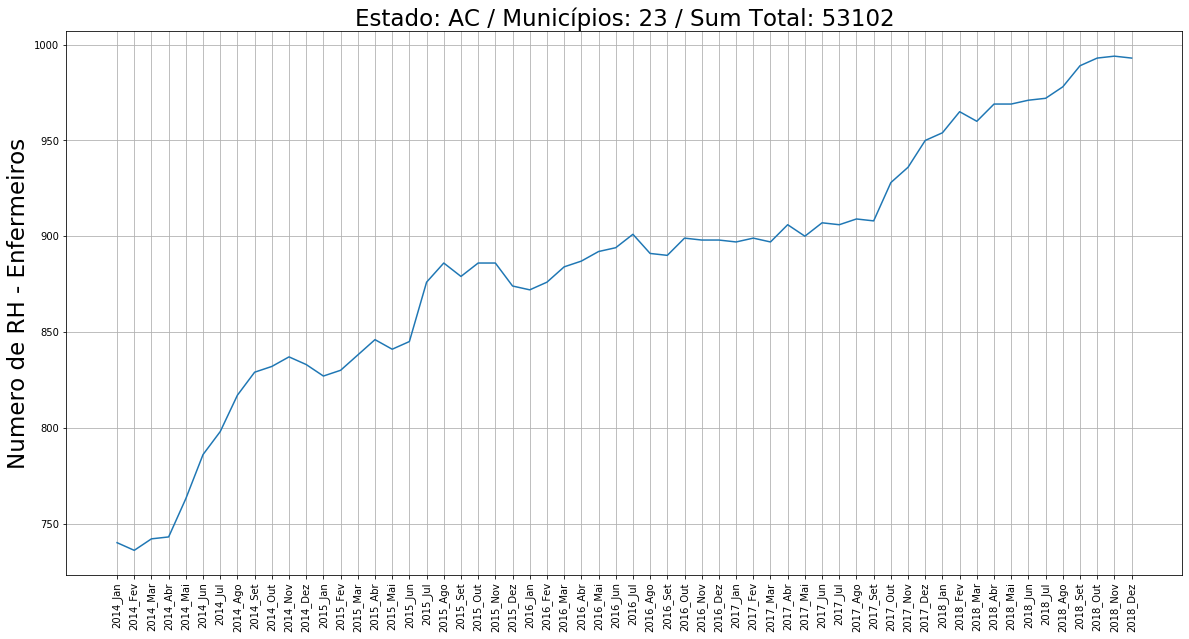

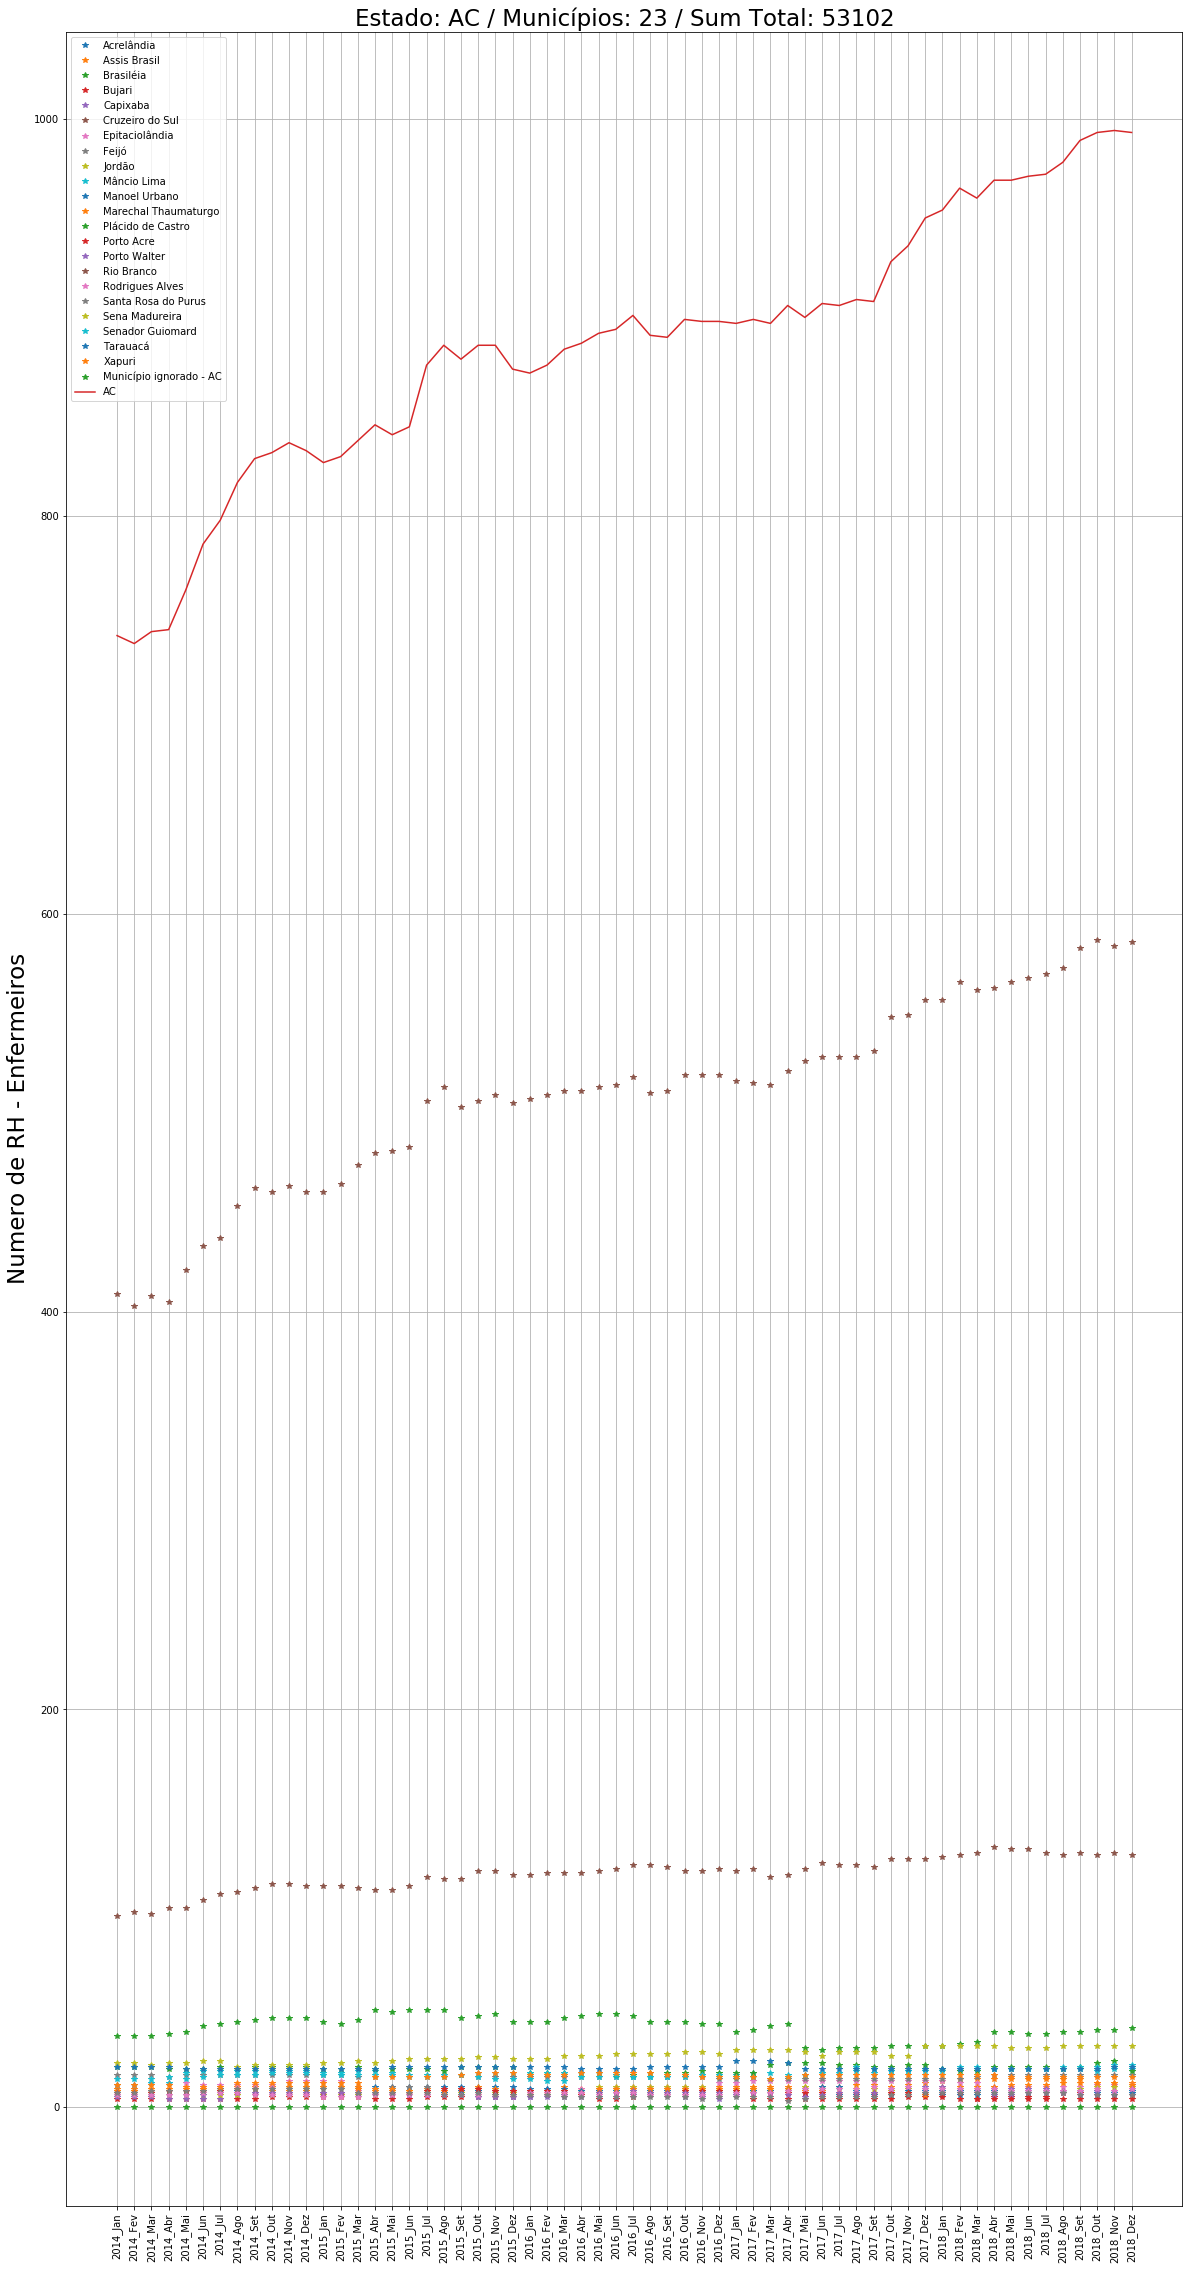

In [9]:
data = pd.read_csv('../data/RH- Enfermeiros.csv', sep=';', skiprows=4, encoding='latin1')
data.columns
data.index
dis = False
aux = data.copy()
describe_anali(aux,dis)
aux = data.copy()
new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
             '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
             '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
             '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
             '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']
name_y_label = 'Numero de RH - Enfermeiros'
plot_RF(aux,new_names,name_y_label)

### RH - Médicos

,Município,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,...,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez
0,110001 Alta Floresta D'Oeste,9,10,10,9,11,10,9,9,9,...,18,17,17,17,17,16,17,17,16,15
1,110037 Alto Alegre dos Parecis,7,7,4,4,5,4,4,5,5,...,8,8,8,8,7,7,7,7,7,6
2,110040 Alto Paraíso,4,3,3,4,6,6,6,6,7,...,6,7,7,5,5,7,8,7,8,8
3,110034 Alvorada D'Oeste,3,3,3,4,4,4,4,4,4,...,6,8,7,6,6,7,7,7,7,6
4,110002 Ariquemes,111,111,113,113,112,112,113,106,111,...,170,162,162,160,163,161,159,156,150,147


,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,...,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez
count,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,...,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000
mean,116.488223,116.686296,117.784440,118.783012,120.341542,121.033904,121.660956,122.197716,122.621342,123.019629,...,139.685225,139.794789,140.158815,140.475018,141.215203,141.463597,141.878658,141.943255,141.825839,141.439329
std,4404.500769,4411.104086,4452.802333,4490.622005,4549.145913,4575.064981,4598.828019,4619.000596,4635.064329,4650.130454,...,5279.602205,5283.919685,5297.267765,5309.291726,5337.097809,5346.288249,5362.072214,5363.987352,5359.921203,5345.976498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
75%,14.000000,14.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,16.000000,16.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000
max,326400.000000,326955.000000,330032.000000,332830.000000,337197.000000,339137.000000,340894.000000,342398.000000,343585.000000,344701.000000,...,391398.000000,391705.000000,392725.000000,393611.000000,395685.000000,396381.000000,397544.000000,397725.000000,397396.000000,396313.000000


,Names,Porcentagem Faltante
0,Município,0.0
1,2014/Jan,0.0
2,2014/Fev,0.0
3,2014/Mar,0.0
4,2014/Abr,0.0
...,...,...
56,2018/Ago,0.0
57,2018/Set,0.0
58,2018/Out,0.0
59,2018/Nov,0.0


,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,33.622642,33.773585,34.415094,34.660377,35.924528,36.547170,36.867925,37.056604,37.132075,37.226415,...,45.660377,45.924528,45.754717,45.698113,46.283019,46.528302,46.566038,46.528302,46.622642,45.433962
std,130.212877,130.559689,130.319494,130.186840,132.837791,134.557046,134.696245,134.516287,133.887300,134.095781,...,157.757597,161.150652,160.348767,161.116129,163.918176,165.497688,166.025080,165.889050,166.724696,166.770052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000
50%,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000
75%,11.000000,11.000000,11.000000,11.000000,14.000000,13.000000,14.000000,16.000000,16.000000,14.000000,...,18.000000,17.000000,17.000000,16.000000,16.000000,16.000000,17.000000,17.000000,16.000000,14.000000
max,929.000000,932.000000,923.000000,922.000000,943.000000,955.000000,955.000000,955.000000,951.000000,952.000000,...,1102.000000,1130.000000,1122.000000,1128.000000,1147.000000,1160.000000,1165.000000,1163.000000,1169.000000,1169.000000


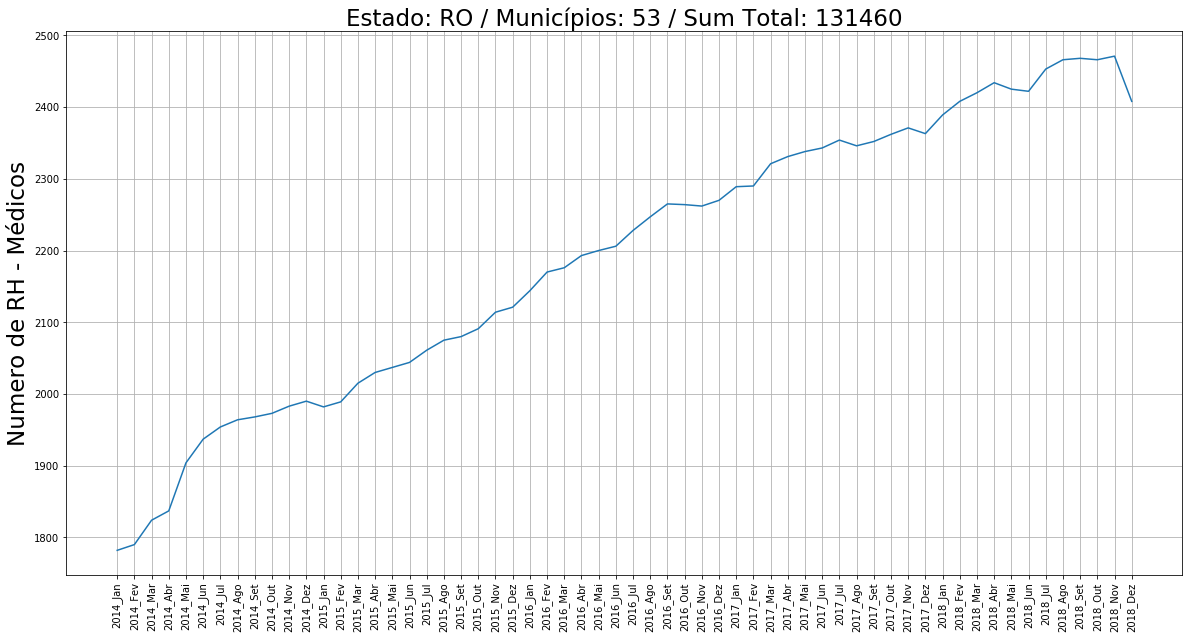

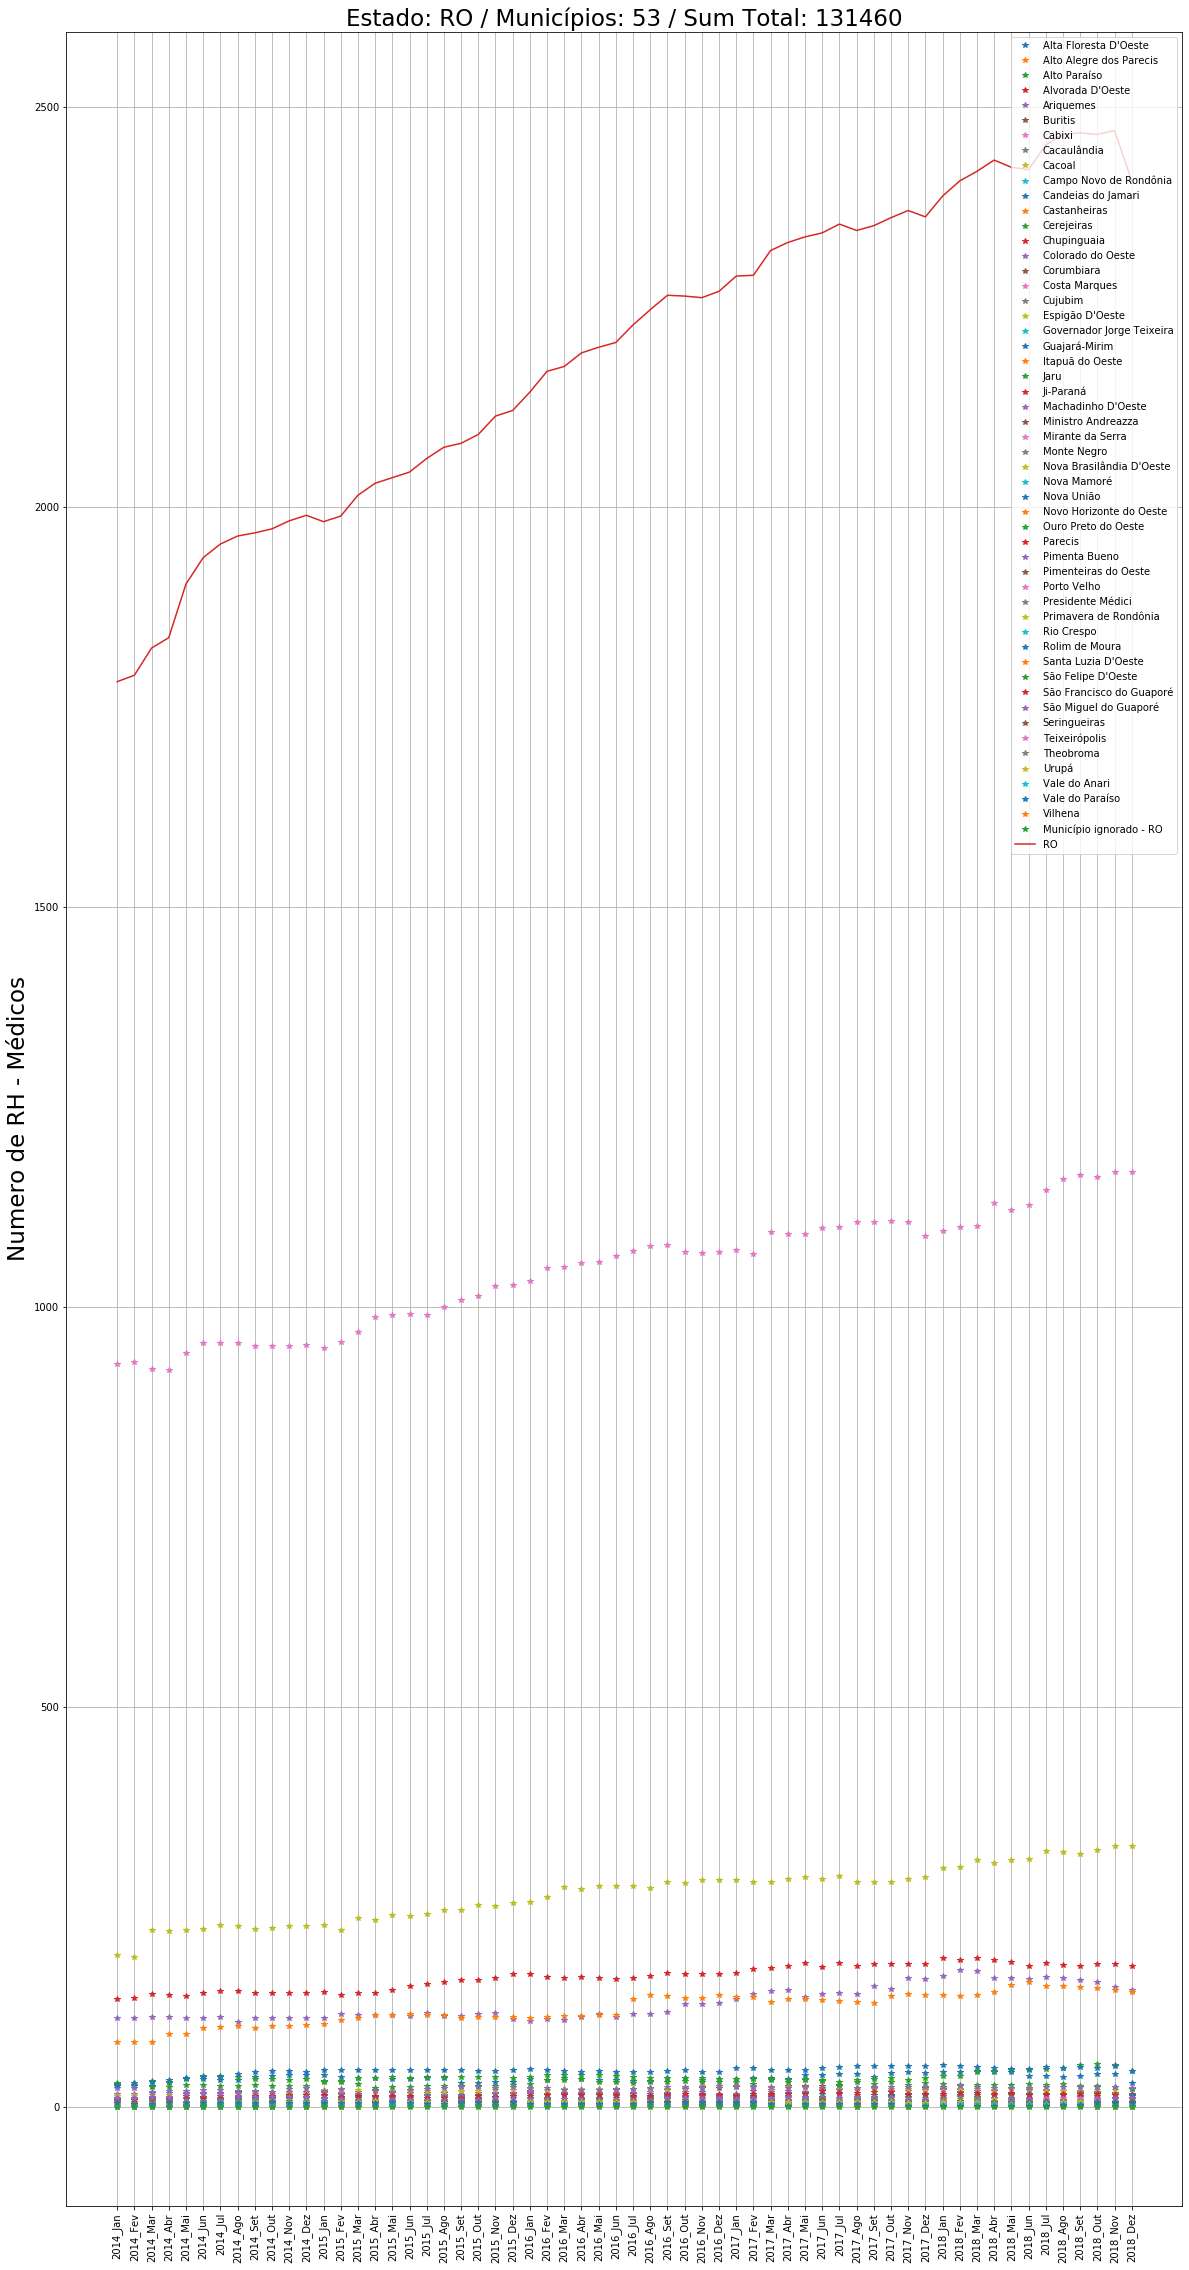

,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,36.00000,35.434783,36.000000,36.130435,36.695652,37.304348,37.086957,37.130435,37.652174,37.478261,...,42.521739,42.782609,42.478261,42.434783,42.652174,43.000000,43.173913,43.434783,42.304348,41.217391
std,125.61449,123.117766,122.215532,123.731860,123.206934,125.403144,124.795437,124.340187,125.567660,124.220797,...,143.019347,144.316558,143.029199,144.306752,144.697053,143.254383,142.875869,143.501291,141.485121,142.755340
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.50000,3.000000,3.500000,3.000000,4.500000,4.000000,4.000000,4.000000,4.500000,4.500000,...,5.500000,5.000000,5.000000,4.000000,4.500000,5.500000,5.500000,5.000000,4.500000,4.000000
50%,5.00000,5.000000,5.000000,5.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,7.000000,6.000000
75%,9.50000,9.500000,10.000000,10.000000,10.000000,10.500000,10.500000,10.500000,10.000000,10.000000,...,11.500000,11.500000,11.500000,11.500000,11.500000,11.500000,11.500000,12.000000,11.000000,10.500000
max,607.00000,595.000000,591.000000,598.000000,596.000000,607.000000,604.000000,602.000000,607.000000,600.000000,...,690.000000,697.000000,691.000000,697.000000,699.000000,692.000000,690.000000,693.000000,683.000000,689.000000


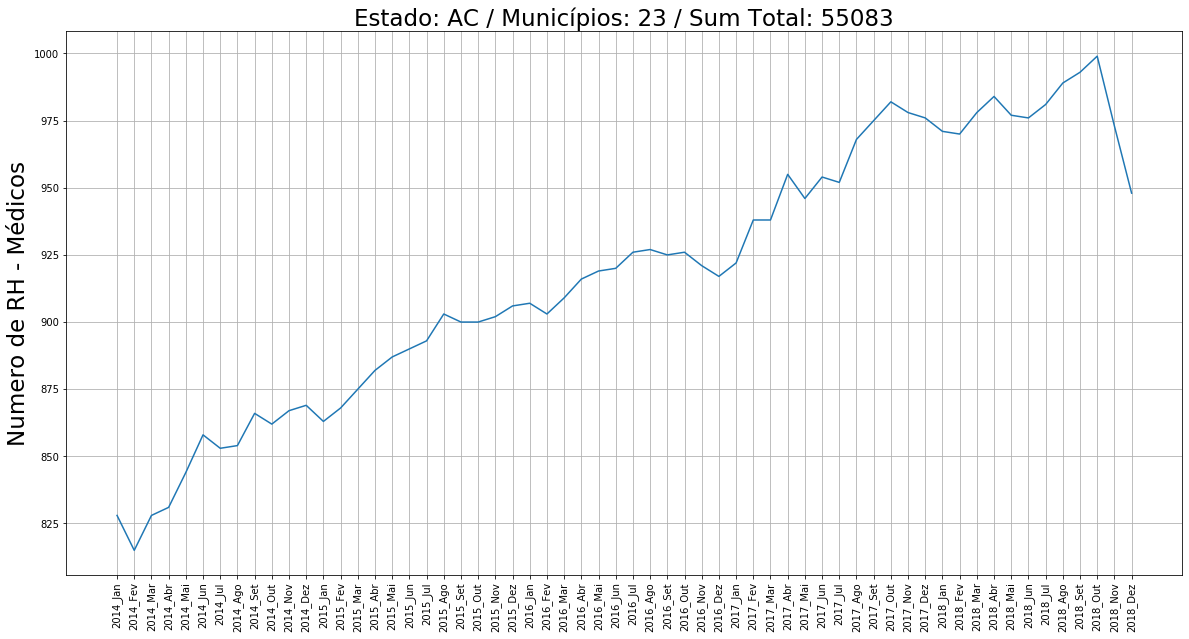

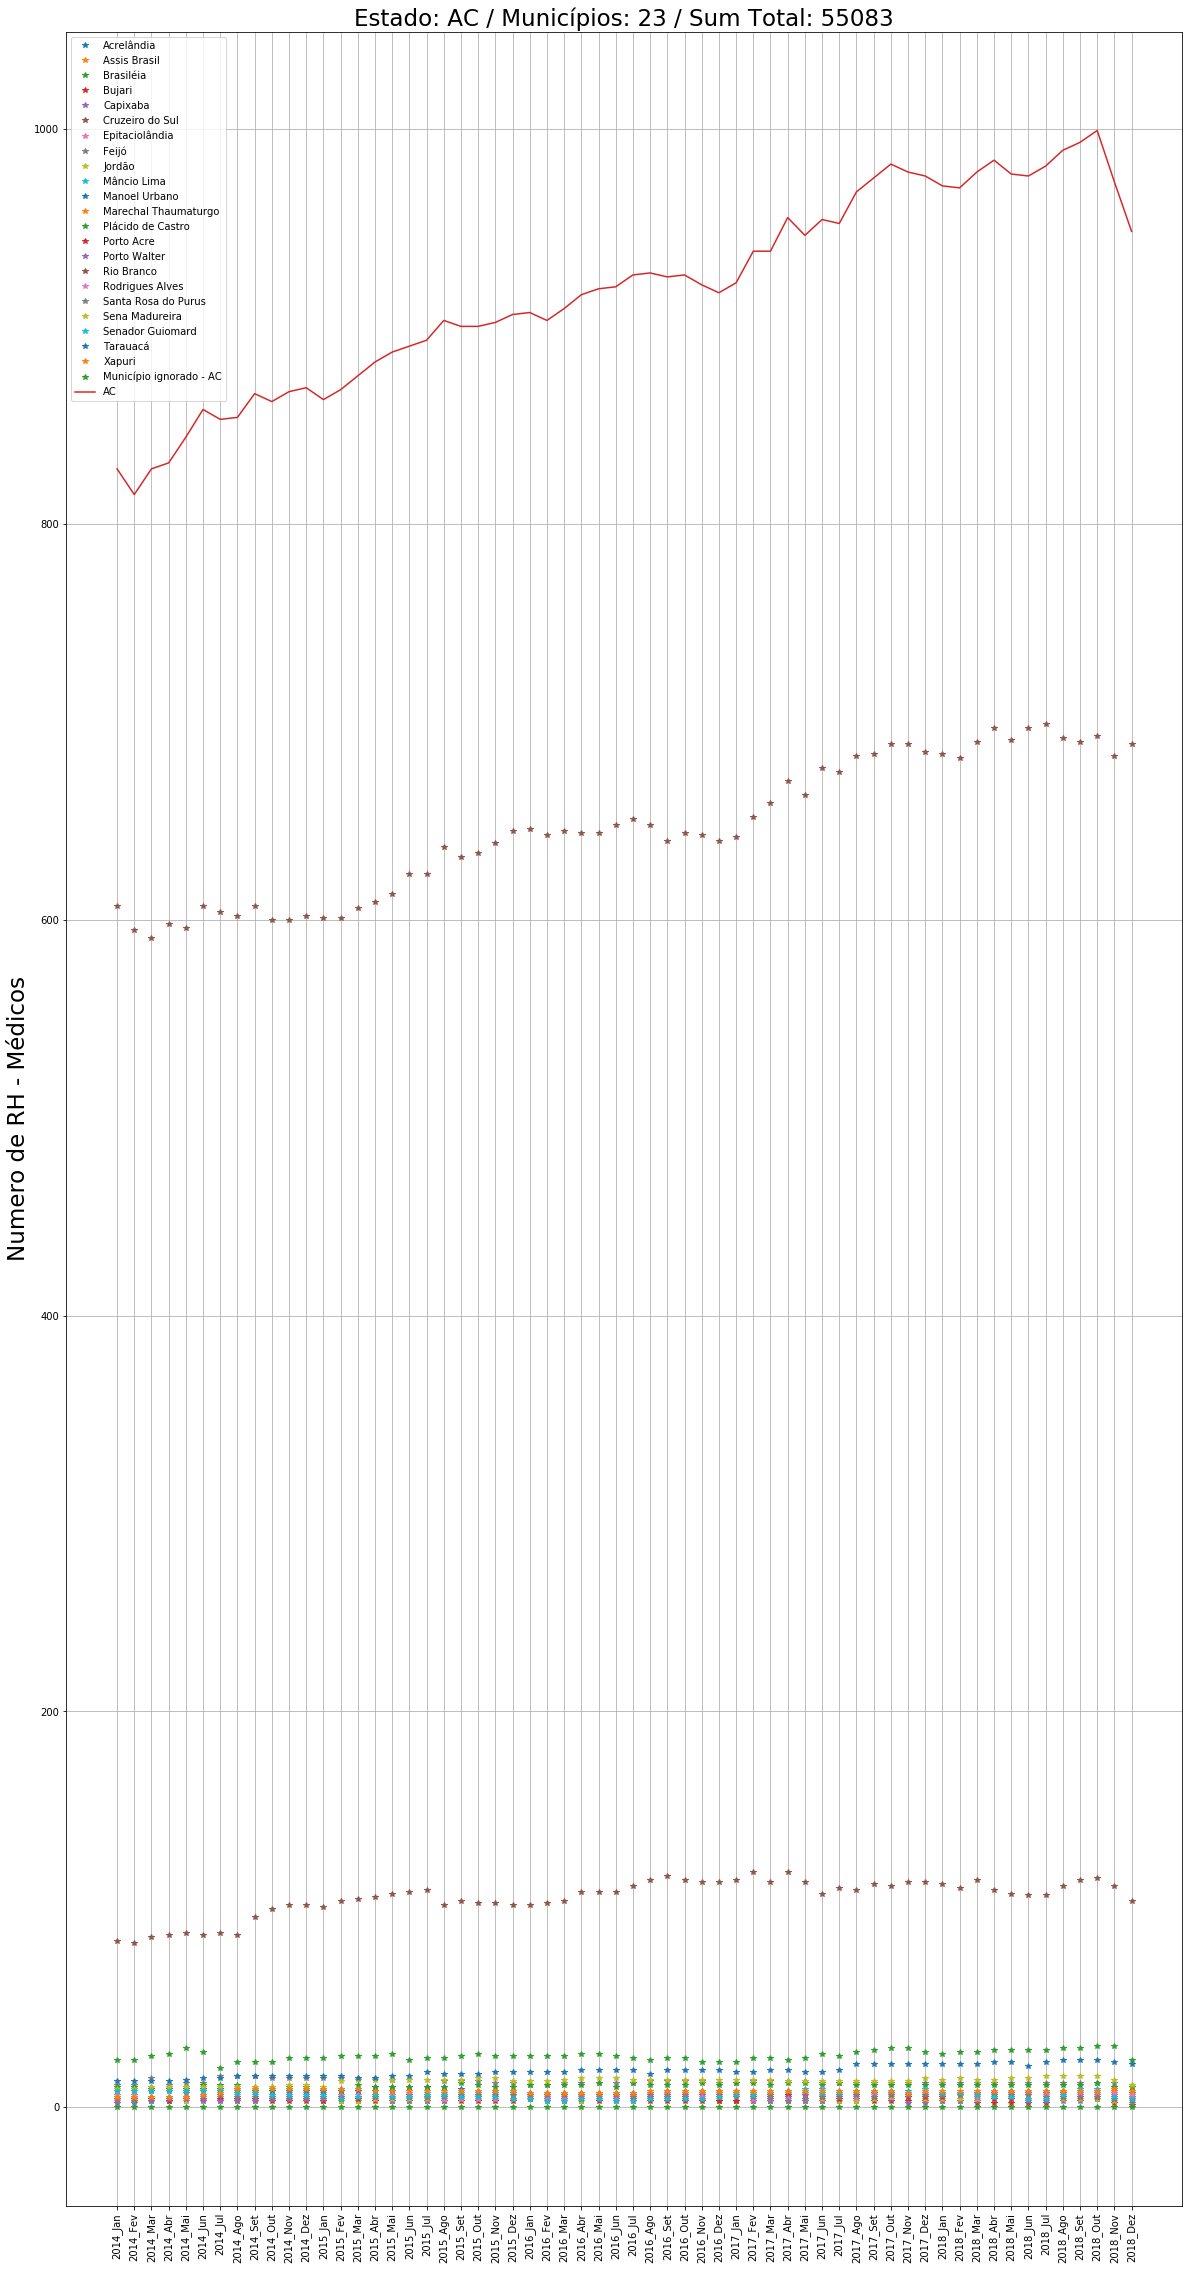

In [10]:
data = pd.read_csv('../data/RH- Médicos.csv', sep=';', skiprows=4, encoding='latin1')
data.columns
data.index
dis = False
aux = data.copy()
describe_anali(aux,dis)
aux = data.copy()
new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
             '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
             '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
             '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
             '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']
name_y_label = 'Numero de RH - Médicos'
plot_RF(aux,new_names,name_y_label)

## Lixo

In [ ]:
# aux = data_leitos_internacao.copy()
# name_y_label = 'Numero de Leitos'
# dataframe = aux
# label_s = new_names
# name_y_label 
# aux_colum = dataframe["Município"].str.split(" ", n = 1, expand = True)
# dataframe["Município"]= aux_colum[1] 
# dataframe.insert(0, "Val_Municipio", aux_colum[0].values, True) 
# dataframe.insert(0, "Estado",  dataframe["Val_Municipio"].str[0:2], True) 

# #Convert int
# dataframe["Estado"] = dataframe["Estado"].apply(pd.to_numeric, errors='coerce')
# dataframe["Val_Municipio"] = dataframe["Val_Municipio"].apply(pd.to_numeric, errors='coerce')

# UF = 11,12
# UF_sig = 'RO','AC'
# state_dict = dict(zip(UF, UF_sig))

# for UF_num, Uf_sig in state_dict.items():
#     dataframe_aux = dataframe.copy()
#     dataframe_aux = dataframe_aux[dataframe_aux['Estado']== UF_num]

#     #display(est_hosp5.describe())
#     dataframe_aux = dataframe_aux.replace('-',0)
#     dataframe_aux = dataframe_aux.replace(np.NaN,0)
#     values = dataframe_aux.values
#     values_np = dataframe_aux.values[:,3:values.shape[1]].astype(int)
    
#     df2 = pd.DataFrame(values_np, columns= new_names)
#     display(df2.describe())
#     out = df2.sum()
#     plt.plot(out.index,out.values)
    
#     tag = dataframe_aux['Município'].values

#     num_hosp = values_np.shape[0]

#     plt.figure(figsize=(20, 40))
#     for val in range(0,num_hosp):
#         plt.plot(label_s, values_np[val,:],'*', label = str(tag[val]))
#     plt.title('Estado: %s / Municípios: %s' %(Uf_sig, num_hosp),fontsize=23)
#     plt.xticks(rotation=90)
#     plt.grid(True)
#     plt.ylabel(name_y_label,fontsize=23)
#     plt.legend()
#     plt.show()

In [ ]:
# df2 = pd.DataFrame(values_np, columns= new_names)
# df2.describe()
# out = df2.sum()
# plt.plot(out.index,out.values)

In [ ]:
# out.sum()